# Predicting House Prices
MACS 33002 Project 1 | Yonjoo Kim, Nicole Yip, Leon Zhang

## Task Introduction
Our task is to train regression models and compare their performances in predicting house prices in King County, USA. We will compare different regression models: DT, RF, and linear regression. This is a supervised regression task as we have labeled data.

Link to our kaggle dataset: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

<u>Notes</u>

This project is structured into sections:
1. Data Cleaning and Pre-Processing
2. Decision Tree Regression
3. Random Forest
4. Linear Regression
5. PCA Analysis
6. Further Analysis & Conclusion

## Part 1. Data cleaning and pre-processing

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1. Data overview

In [263]:
# Reading data from file
df = pd.read_csv("https://raw.githubusercontent.com/nyipuchicago/ML_project1/main/kc_house_data.csv")

In [264]:
df.shape # shape: (samples, attributes)

(21613, 21)

There are 21613 instances in this dataset and 21 attributes (including id, date, and price: our target variable). 

All the features are numerical, with one date column.

In [265]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2. Data cleaning and preprocessing

In [266]:
# Check missing values
null_sum = df.isnull().sum()
null_sum

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values in this dataset.

In [267]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

#### 1.2.1. Processing numerical data

In [268]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


- bedrooms
- bathrooms
- sqft_living
- sqft_lot
- floors
- waterfront
- view
- condition
- grade
- sqft_above
- sqft_basement
- yr_built
- yr_renovated
- sqft_living15
- sqft_lot15

We will decide appropriate outliers to remove: if it is in the hundreds, we will remove them as they are likely true outliers. In the thousands, it may represent natural variation that we want to keep in the dataset.

In [269]:
# helper function to determine outliers through IQR
def summarise_quartiles(df, col):
    Q1 = np.quantile(df[col], 0.25)
    Q3 = np.quantile(df[col], 0.75)
    IQR = Q3 - Q1
    lower_thresh = Q1 - 1.5 * IQR
    upper_thresh = Q3 + 1.5 * IQR
    print("Q1:", Q1, "Q3:", Q3, "min:", lower_thresh, "max:", upper_thresh)
    print("Number of outliers under min_thresh:", len(df[df[col] < lower_thresh]))
    print("Number of outliers above max_thresh:", len(df[df[col] > upper_thresh]))
    return lower_thresh, upper_thresh

#### bedrooms

<AxesSubplot: xlabel='bedrooms'>

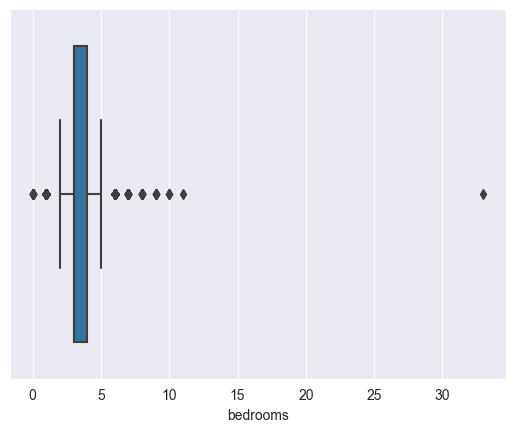

In [270]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['bedrooms'], orient='h')

In [271]:
lower_thresh, upper_thresh = summarise_quartiles(df, 'bedrooms')

Q1: 3.0 Q3: 4.0 min: 1.5 max: 5.5
Number of outliers under min_thresh: 212
Number of outliers above max_thresh: 334


In [272]:
# Based on the above calculation, and our standard we wrote above, we will remove samples that are outliers
print(f"Shape before: {df.shape}")
df.drop(df[df['bedrooms'] > upper_thresh].index, inplace=True)
df.drop(df[df['bedrooms'] < lower_thresh].index, inplace=True)
print(f"Shape after:  {df.shape}")

Shape before: (21613, 21)
Shape after:  (21067, 21)


#### bathrooms

<AxesSubplot: xlabel='bathrooms'>

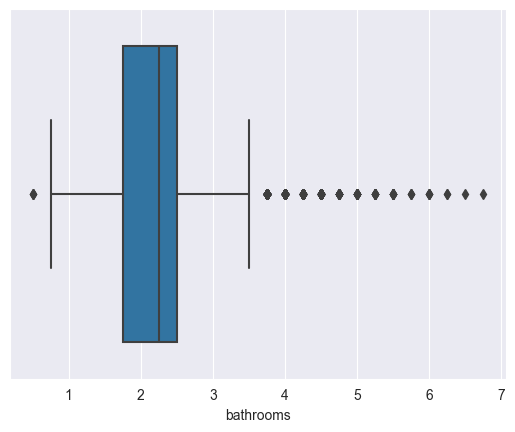

In [273]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['bathrooms'], orient='h')

In [274]:
lower_thresh, upper_thresh = summarise_quartiles(df, 'bathrooms')

Q1: 1.75 Q3: 2.5 min: 0.625 max: 3.625
Number of outliers under min_thresh: 3
Number of outliers above max_thresh: 458


In [275]:
df.shape

(21067, 21)

In [276]:
# Based on the above calculation, and our standard we wrote above, we will remove samples that are outliers
print(f"Shape before: {df.shape}")
df.drop(df[df['bathrooms'] > upper_thresh].index, inplace=True)
df.drop(df[df['bathrooms'] < lower_thresh].index, inplace=True)
print(f"Shape after:  {df.shape}")

Shape before: (21067, 21)
Shape after:  (20606, 21)


#### sqft_living

<AxesSubplot: xlabel='sqft_living'>

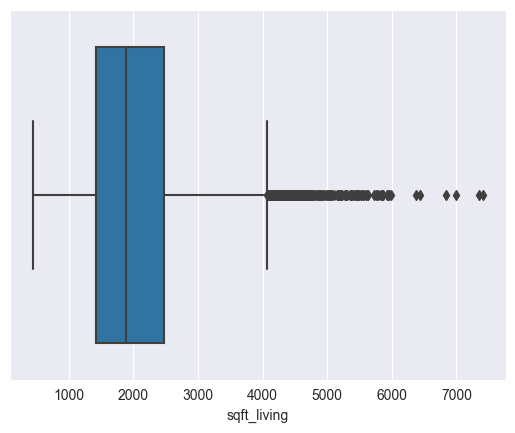

In [277]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['sqft_living'], orient='h')

In [278]:
lower_thresh, upper_thresh = summarise_quartiles(df, 'sqft_living')

Q1: 1420.0 Q3: 2480.0 min: -170.0 max: 4070.0
Number of outliers under min_thresh: 0
Number of outliers above max_thresh: 377


In [279]:
df.shape

(20606, 21)

In [280]:
# Based on the above calculation, and our standard we wrote above, we will remove samples that are outliers
print(f"Shape before: {df.shape}")
df.drop(df[df['sqft_living'] > upper_thresh].index, inplace=True)
df.drop(df[df['sqft_living'] < lower_thresh].index, inplace=True)
print(f"Shape after:  {df.shape}")

Shape before: (20606, 21)
Shape after:  (20229, 21)


#### sqft_lot

<AxesSubplot: xlabel='sqft_lot'>

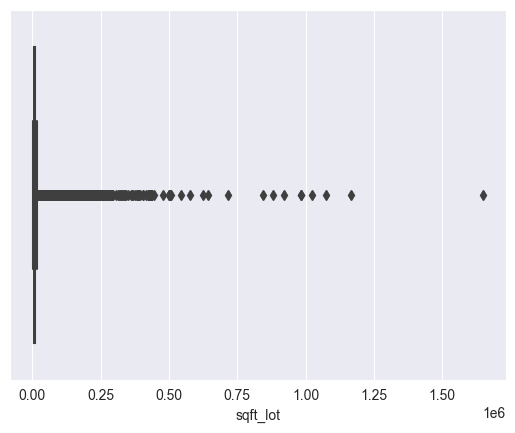

In [281]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['sqft_lot'], orient='h')

In [282]:
lower_thresh, upper_thresh = summarise_quartiles(df, 'sqft_lot')

Q1: 5000.0 Q3: 10300.0 min: -2950.0 max: 18250.0
Number of outliers under min_thresh: 0
Number of outliers above max_thresh: 2148


As we have mentioned above, we will not remove outliers if we believe that it may be due to natural variation. In this variable, there are 2148 outliers in out dataset which originally has above 20k instances. We believe that removing these outliers may impact our analysis and create an unrealistic model that is not complex enough.

#### floors

<AxesSubplot: xlabel='floors'>

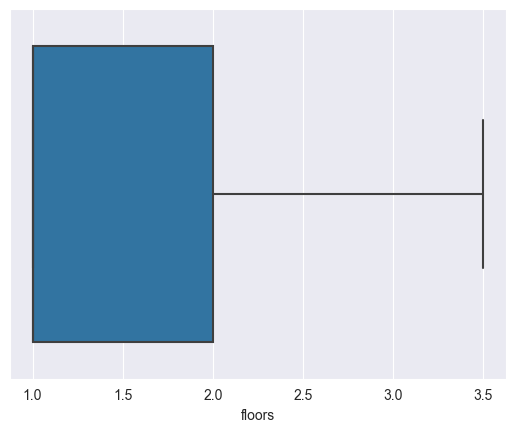

In [283]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['floors'], orient='h')

In [284]:
lower_thresh, upper_thresh = summarise_quartiles(df, 'floors')

Q1: 1.0 Q3: 2.0 min: -0.5 max: 3.5
Number of outliers under min_thresh: 0
Number of outliers above max_thresh: 0


There are no outliers for this feature.

#### waterfront

<AxesSubplot: xlabel='waterfront'>

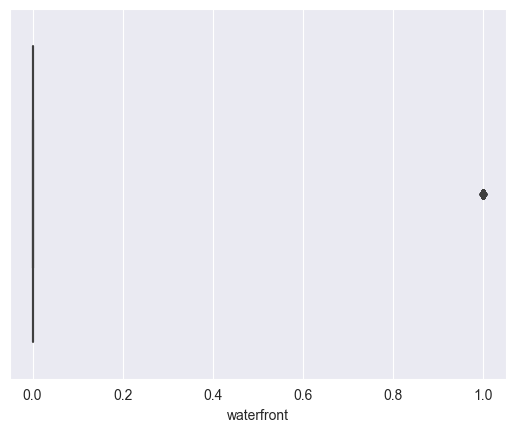

In [285]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['waterfront'], orient='h')

In [286]:
lower_thresh, upper_thresh = summarise_quartiles(df, 'waterfront')

Q1: 0.0 Q3: 0.0 min: 0.0 max: 0.0
Number of outliers under min_thresh: 0
Number of outliers above max_thresh: 114


With this case, there are 114 outliers. However, all these outliers, if we refer to df.describe from above, are "1", indicating the presence of a waterfront property. These are not technically outliers, in our opinion, as there are simply just not many properties that are waterfront. Instead of removing them, we will note not to use "waterfront" as a feature in our models, as it is not a common enough feature to gain information from, but also we will not remove it as outliers as the 114 instances may have useful information about the houses other than its property of having a waterfront location.

#### view

<AxesSubplot: xlabel='view'>

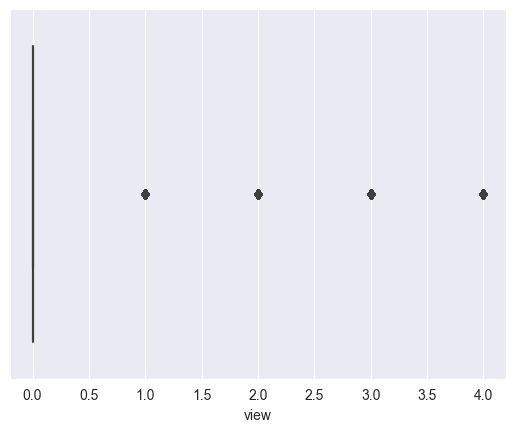

In [287]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['view'], orient='h')

In [288]:
lower_thresh, upper_thresh = summarise_quartiles(df, 'view')

Q1: 0.0 Q3: 0.0 min: 0.0 max: 0.0
Number of outliers under min_thresh: 0
Number of outliers above max_thresh: 1736


Here we notice that there are 1736 outliers above max. We have created the standard that we will not remove when the outliers number is in the thousands. However, we will also note that the "view" variable indicates a rating of the view of the house, and only 1736 out of around 20k instances have this rating. We will not remove them as outliers as that may impact our data integrity, but we will note that this should not therefore be used as a feature in our model, as most of the instances do not have information for this column.

#### condition

<AxesSubplot: xlabel='condition'>

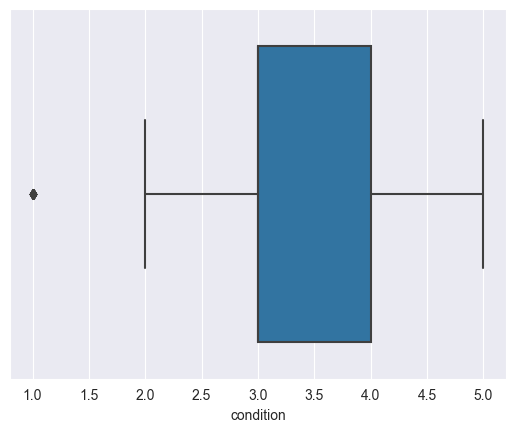

In [289]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['condition'], orient='h')

In [290]:
lower_thresh, upper_thresh = summarise_quartiles(df, 'condition')

Q1: 3.0 Q3: 4.0 min: 1.5 max: 5.5
Number of outliers under min_thresh: 24
Number of outliers above max_thresh: 0


In [291]:
# Based on the above calculation, and our standard we wrote above, we will remove samples that are outliers
print(f"Shape before: {df.shape}")
df.drop(df[df['condition'] > upper_thresh].index, inplace=True)
df.drop(df[df['condition'] < lower_thresh].index, inplace=True)
print(f"Shape after:  {df.shape}")

Shape before: (20229, 21)
Shape after:  (20205, 21)


#### grade

<AxesSubplot: xlabel='grade'>

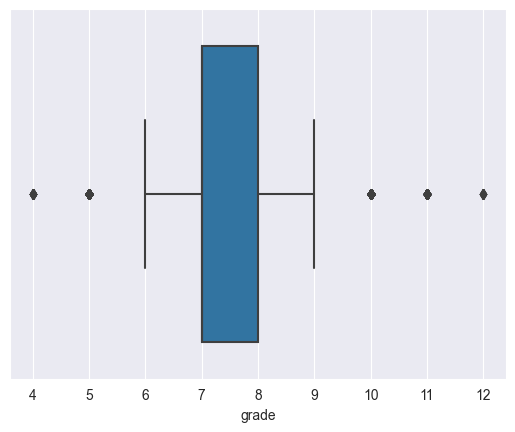

In [292]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['grade'], orient='h')

In [293]:
lower_thresh, upper_thresh = summarise_quartiles(df, 'grade')

Q1: 7.0 Q3: 8.0 min: 5.5 max: 9.5
Number of outliers under min_thresh: 208
Number of outliers above max_thresh: 969


There are too many outliers based on our standard to remove (208 + 969 = 1177 > 1000). We will not remove these outliers as they might represent natural variation. Also, it is notable that this variable represents a grade rating, supporting the idea that this is probably natural variation (as some houses must be placed on the scale of bad, good, and the extremes)

#### sqft_above

<AxesSubplot: xlabel='sqft_above'>

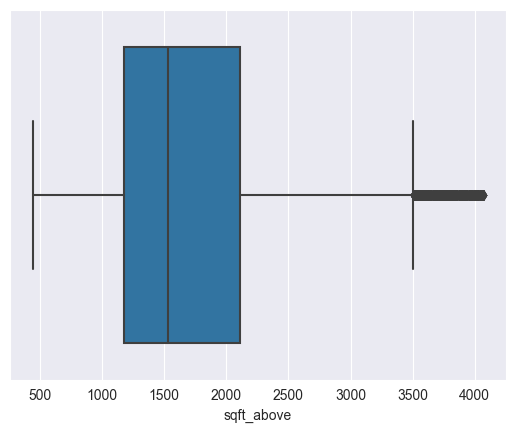

In [294]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['sqft_above'], orient='h')

In [295]:
lower_thresh, upper_thresh = summarise_quartiles(df, 'sqft_above')

Q1: 1180.0 Q3: 2110.0 min: -215.0 max: 3505.0
Number of outliers under min_thresh: 0
Number of outliers above max_thresh: 356


In [296]:
# Based on the above calculation, and our standard we wrote above, we will remove samples that are outliers
print(f"Shape before: {df.shape}")
df.drop(df[df['sqft_above'] > upper_thresh].index, inplace=True)
df.drop(df[df['sqft_above'] < lower_thresh].index, inplace=True)
print(f"Shape after:  {df.shape}")

Shape before: (20205, 21)
Shape after:  (19849, 21)


#### sqft_basement

<AxesSubplot: xlabel='sqft_basement'>

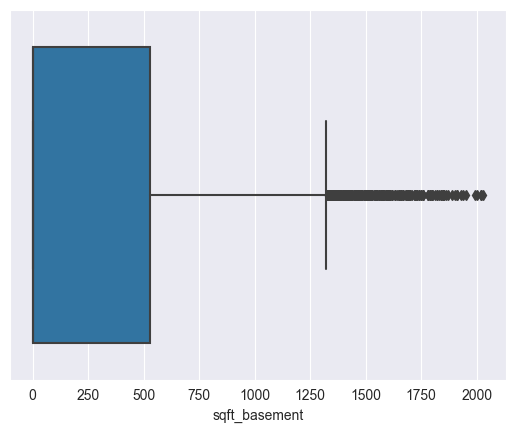

In [297]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['sqft_basement'], orient='h')

In [298]:
lower_thresh, upper_thresh = summarise_quartiles(df, 'sqft_basement')

Q1: 0.0 Q3: 530.0 min: -795.0 max: 1325.0
Number of outliers under min_thresh: 0
Number of outliers above max_thresh: 398


In [299]:
# Based on the above calculation, and our standard we wrote above, we will remove samples that are outliers
print(f"Shape before: {df.shape}")
df.drop(df[df['sqft_basement'] > upper_thresh].index, inplace=True)
df.drop(df[df['sqft_basement'] < lower_thresh].index, inplace=True)
print(f"Shape after:  {df.shape}")

Shape before: (19849, 21)
Shape after:  (19451, 21)


#### yr_built

<AxesSubplot: xlabel='yr_built'>

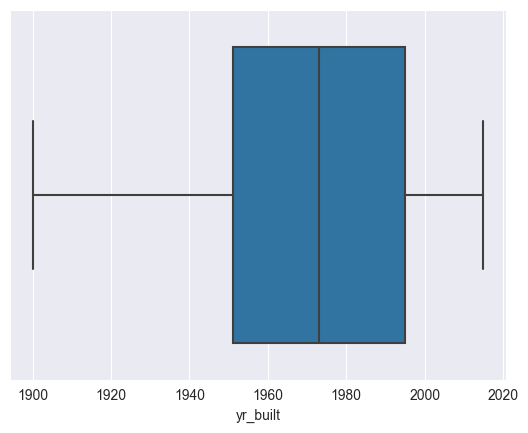

In [300]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['yr_built'], orient='h')

In [301]:
lower_thresh, upper_thresh = summarise_quartiles(df, 'yr_built')

Q1: 1951.0 Q3: 1995.0 min: 1885.0 max: 2061.0
Number of outliers under min_thresh: 0
Number of outliers above max_thresh: 0


There are no outliers for this feature.

#### yr_renovated

<AxesSubplot: xlabel='yr_renovated'>

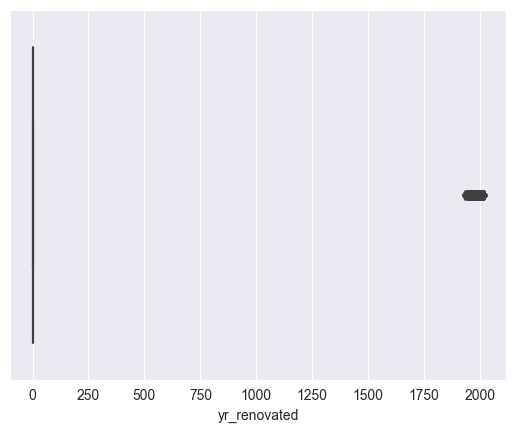

In [302]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['yr_renovated'], orient='h')

In [303]:
lower_thresh, upper_thresh = summarise_quartiles(df, 'yr_renovated')

Q1: 0.0 Q3: 0.0 min: 0.0 max: 0.0
Number of outliers under min_thresh: 0
Number of outliers above max_thresh: 762


In this case, we have 762 outliers, which normally should fit our standard of outliers to remove. However, in this case, it seems that for this particular variable, all the other instances are 0, meaning that there is no information on year renovated. Therefore, it seems like the outliers here have more to do with the fact that the original dataset does not have "na" and pre-filled them with 0. We will not remove these outliers as it is rather a problem that the dataset does not normally have data for this column. Rather, we will remove this column as a feature for the purpose of training our model and our analysis.

#### sqft_living15

<AxesSubplot: xlabel='sqft_living15'>

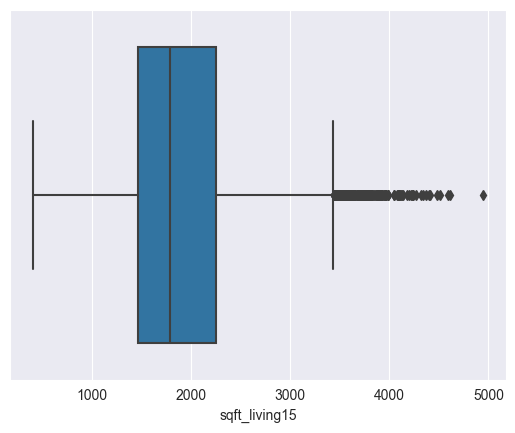

In [304]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['sqft_living15'], orient='h')

In [305]:
lower_thresh, upper_thresh = summarise_quartiles(df, 'sqft_living15')

Q1: 1460.0 Q3: 2250.0 min: 275.0 max: 3435.0
Number of outliers under min_thresh: 0
Number of outliers above max_thresh: 253


In [306]:
# Based on the above calculation, and our standard we wrote above, we will remove samples that are outliers
print(f"Shape before: {df.shape}")
df.drop(df[df['sqft_living15'] > upper_thresh].index, inplace=True)
df.drop(df[df['sqft_living15'] < lower_thresh].index, inplace=True)
print(f"Shape after:  {df.shape}")

Shape before: (19451, 21)
Shape after:  (19198, 21)


#### sqft_lot15

<AxesSubplot: xlabel='sqft_lot15'>

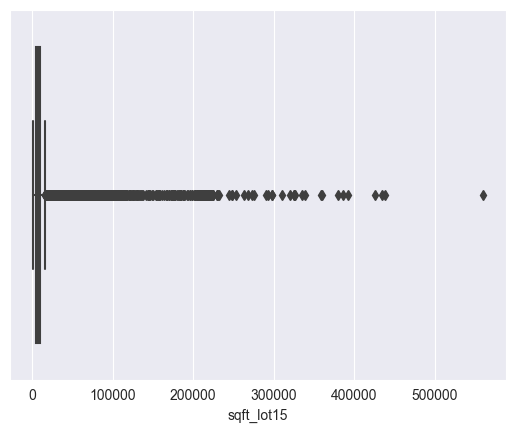

In [307]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['sqft_lot15'], orient='h')

In [308]:
lower_thresh, upper_thresh = summarise_quartiles(df, 'sqft_lot15')

Q1: 5000.0 Q3: 9680.0 min: -2020.0 max: 16700.0
Number of outliers under min_thresh: 0
Number of outliers above max_thresh: 1644


Adhereing to the standards we set above, 1644 outliers is too many to remove as it may be natural variation.

<u>Notes</u>

In the data cleaning process, we have justified each outlier removal process according to the standard we set above. Notably, we have noticed that we should drop the columns "waterfront" "view" and "yr_renovated" as it seems they are technically columns with many NA values that have been pre-filled to be 0.

Also, we have not touched zipcode, lat, long for the cleaning process as the "outliers" would not make sense as outliers, as these are geographical information and as such the outliers will not be well captured by IQR.

Zipcode/latitude/longitude are not explicitly processed, as they all seem to be within reasonable deviations based on the minimum/maximum in pd.describe(); no outliers. They will be used later on as potential inputs for the PCA analysis.

We will continue processing our data without the id, as it does not provide any useful insights for the price of a house.

In [309]:
# Make a copy of the original dataframe
df_orig = df.copy(deep=True)

# Drop columns
df.drop(columns=["waterfront", "view", "yr_renovated"], inplace=True)
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

Now, we have removed around 10% of our data through cleaning. We deem this to be a sufficient amount that should also maintain complexity for our model

### 1.2.3. Data Transformation: Normalization

We will try log normalization on price, as the original prices are not normally distributed (rather, they are approximately lognormal: see the graph below). It will be important to normalize these as we will use linear regression correlation measures (Pearson's correlation coefficient and $R^2$ values) to see which features to keep in our ML models, and nearly normally distributed variables are an assumption of linear regression models.

We used log normalization for price as it is often used for variables with skewed distributions, such as in this example where price as a right skew.

array([[<AxesSubplot: title={'center': 'log_price'}>,
        <AxesSubplot: title={'center': 'price'}>]], dtype=object)

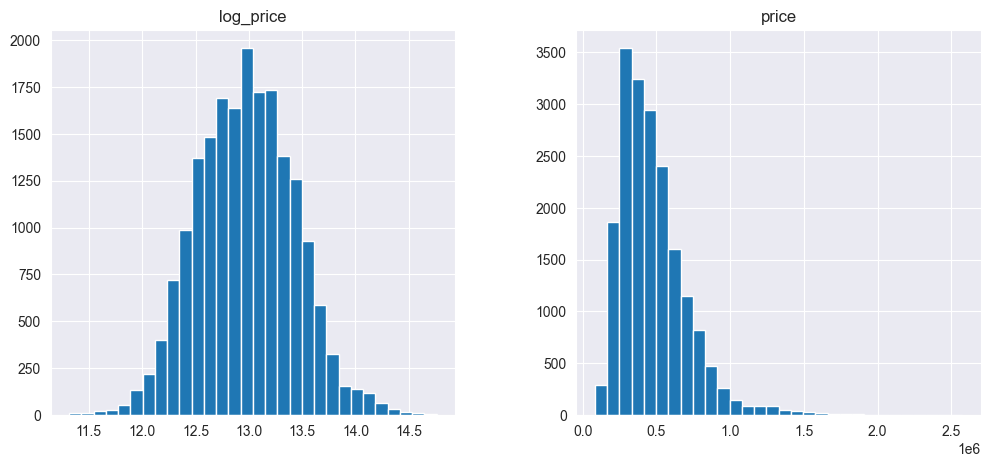

In [310]:
df['log_price'] = np.log(df['price'])
df[['log_price', 'price']].hist(figsize=(12,5),bins=30)

For the other variables, we are going to use MinMaxScaler to normalize as they are not as large values as "price":

In [311]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df['bedrooms'] = scaler.fit_transform(df[['bedrooms']].values)
df['bathrooms'] = scaler.fit_transform(df[['bathrooms']].values)
df['sqft_living'] = scaler.fit_transform(df[['sqft_living']].values)
df['sqft_lot'] = scaler.fit_transform(df[['sqft_lot']].values)
df['floors'] = scaler.fit_transform(df[['floors']].values)
df['condition'] = scaler.fit_transform(df[['condition']].values)
df['grade'] = scaler.fit_transform(df[['grade']].values)
df['sqft_above'] = scaler.fit_transform(df[['sqft_above']].values)
df['sqft_basement'] = scaler.fit_transform(df[['sqft_basement']].values)
df['yr_built'] = scaler.fit_transform(df[['yr_built']].values)
df['sqft_living15'] = scaler.fit_transform(df[['sqft_living15']].values)
df['sqft_lot15'] = scaler.fit_transform(df[['sqft_lot15']].values)

### Part 1.3 Exploratory Data Analysis (EDA)

To decide which features to keep for our models, we will perform EDA and check the correlation between variables and the target variable (log_price). We will be using the following metric:

Pearson correlation coefficient (we will keep features with correlation > 0.2, which is a known standard for having *some* correlation)

### Pearson correlation coefficient matrix

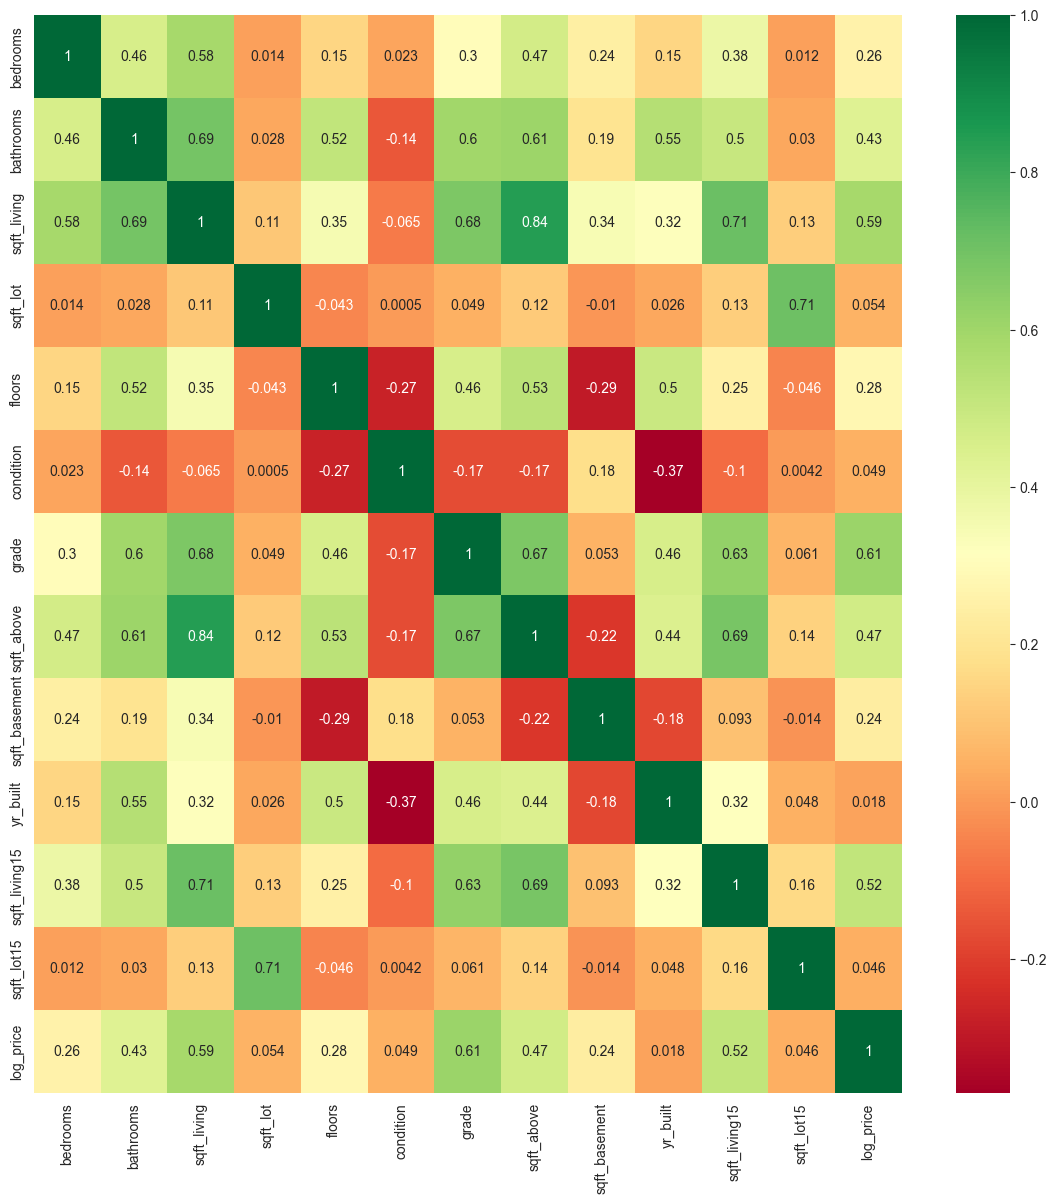

In [312]:
# Pearson correlation coefficient heat matrix
_, ax = plt.subplots(figsize=(14,14))
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15',
          'log_price']
sns.heatmap(df[columns].corr(),annot=True,cmap='RdYlGn', ax=ax);

According to the heat map above, we will determine the features' correlation with log_price. 
We decided 0.2 to be our threshold to determine if the features have a correlation with log_price.

The features are: bedrooms, bathrooms, floors, sqft_basement, sqft_living, grade, sqft_above, sqft_living15.

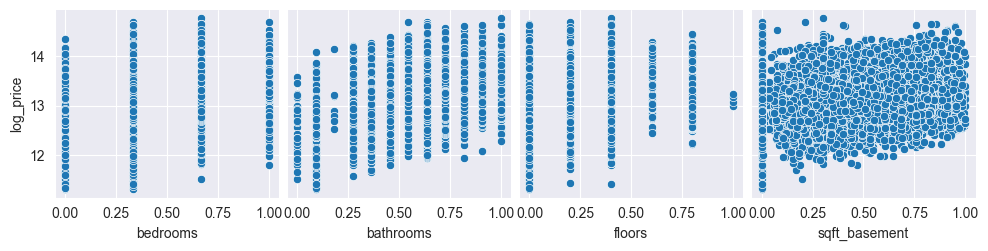

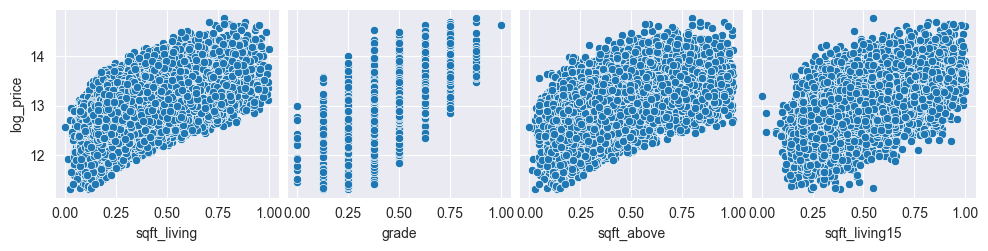

In [313]:
topfeatures = ['bedrooms', 'bathrooms', 'floors', 'sqft_basement', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']
sns.pairplot(df, x_vars=topfeatures[:4], y_vars=['log_price'])
sns.pairplot(df, x_vars=topfeatures[4:], y_vars=['log_price'])
plt.show()

We will talk more about these scatterplots in our model interpretations below. Please refer to the corresponding sections for each model. Overall, most of the features that aren't categorical variables display important trends, and are positively correlated with 'log_price'. These features include: 'bathrooms', 'sqft_basement', 'sqft_living', 'grade', 'sqft_above' and 'sqft_living15'.

## Part 2. Decision Tree Model

#### 2.1. Setting Up Decision Tree Regressor

We are going to start by trying a decision tree model as DT models are well-suited for capturing linear relationships between the features and target variable. From our EDA, especially looking at the Pearson correlation coefficients from our heat map matrix, there are possibly moderate lienar relationships between the features and target variables (anywhere from 0.26, low but possible correlation to 0.6, moderately strong positive).

In [314]:
# Using our features that have Pearson correlation > 0.2, We will create a new df of only these features
model_df = df.drop(columns=["sqft_lot", "condition", "yr_built", "sqft_lot15", "id", "date", "price", "zipcode", "lat", "long"])
model_df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'log_price'],
      dtype='object')

In [315]:
# Setting up arrays for features (X) and target variable (y):
X = model_df.drop(columns='log_price')
y = model_df.log_price

In [316]:
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Randomly sample 80% of the data as training data and 20% as testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Create DT Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [317]:
accuracy = dt_reg.score(X_test, y_test)
f"Accuracy score for DT Regressor: {accuracy:.3f}"

'Accuracy score for DT Regressor: 0.073'

Un-comment the below for later graphing: my computer would not graph without crashing (the code works, but it takes a lot of processing time/power)

In [167]:
# dot_data = tree.export_graphviz(dt_reg, out_file=None, 
#                                 feature_names=list(X.columns),  
#                                 class_names=y,  
#                                 filled=True, rounded=True,  
#                                 special_characters=True)  
# graph = graphviz.Source(dot_data)
# display(graph)

In [168]:
# tree_graph = tree.plot_tree(dt_reg)

#### 2.2. Fine-Tuning Decision Tree Parameters

Above, we have trained the regressor with no parameter tuning.

Clearly, we must do some model tuning, as the accuracy for this model is not good (0.073 accuracy score).

max_depth determines the maximum height of the tree. Right now, it seems like going until the nodes are pure is creating an overcomplex tree. An overcomplex tree will mean that overfitting occurs, which captures too much noise in the training data and will lead to poor performance on unseen data.

We will try different values of max_depth to see what gets the best accuracy score. 

In [318]:
# From iterative testing, max_depth=7 gives the highest accuracy
dt_reg2 = DecisionTreeRegressor(max_depth= 7, random_state=42)
dt_reg2.fit(X_train, y_train)

accuracy = dt_reg2.score(X_test, y_test)
f"New accuracy score for DT Regressor: {accuracy:.3f}"

'New accuracy score for DT Regressor: 0.461'

Still, we want to improve the accuracy from 0.461. We will now try to adjust min_samples_split, which determines the minimum number of samples required for a node to split; this balances the tradeoff between overfitting and underfitting

The empirical rule states a rule of thumb is to set min_samples_split to 2-5% of the total number of samples. We have 19198 samples, so the range should be 383-960 samples. We found our optimal accuracy just under this rule of thumb via iterative testing, with a min_sample_split of 200.

Due to the inter-dependency of the parameters, after changing min_samples_split, max_depth can be improved even more with more adjusting. After further fine-turining, we have max_depth = 9 combined with min_samples_split = 200.

In [319]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# From testing, max_depth = 9 combined with min_samples_split = 200 gives the best accuracy so far
dt_reg3 = DecisionTreeRegressor(max_depth= 9, min_samples_split=200, random_state=42)
dt_reg3.fit(X_train, y_train)

# Computing error measures
dt_accuracy = dt_reg3.score(X_test, y_test)
y_test_pred = dt_reg3.predict(X_test)
y_train_pred = dt_reg3.predict(X_train)

# Printing results
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred):.3f}; Train MSE: {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred):.3f}; Train MAE: {mean_absolute_error(y_train, y_train_pred):.3f}")
print(f"New accuracy score for DT Regressor: {dt_accuracy:.3f}")

Test MSE: 0.110; Train MSE: 0.099
Test MAE: 0.264; Train MAE: 0.253
New accuracy score for DT Regressor: 0.475


Un-comment the below for later graphing: my computer would not graph without crashing (the code works, but it takes a lot of processing time/power)

In [320]:
# dot_data = tree.export_graphviz(dt_reg3, out_file=None, 
#                                 feature_names=list(X.columns),  
#                                 class_names=y,  
#                                 filled=True, rounded=True,  
#                                 special_characters=True)  
# graph = graphviz.Source(dot_data)
# display(graph)

In [321]:
# tree_graph = tree.plot_tree(dt_reg3)

After tuning the model, the accuracy score is still unsatisfactory. We are starting to think that it may not necessarily be a problem with over/underfitting the decision tree regressor, but rather that the features and target variable may contain more complex non-linear relationships. Therefore, a random forest model would be more capable of modeling non-linear relationships through the combination of multiple DTs. Additionally, RF can help us reduce overfitting, which may still be happening here with our DT even after tuning.

In [322]:
# More model evaluation: show top coefficient features
importances = dt_reg3.feature_importances_
results_dt = pd.DataFrame({'feature name': list(X.columns), 'importance': importances})
results_dt.index.name = "feature"
results_dt = results_dt.sort_values('importance', ascending=False)
results_dt

,feature name,importance
feature,,
4,grade,0.712679
2,sqft_living,0.079729
6,sqft_basement,0.065215
7,sqft_living15,0.055607
3,floors,0.048389
5,sqft_above,0.017099
1,bathrooms,0.011479
0,bedrooms,0.009802


### 2.3. Interpreting DT performance

Since we have done normalized the data before training the model (feature scaling), we have tried to reduce the bias of feature importance towards high cardinality features (particularly when the features have many unique values). The above importance is estimated by averaging the impurity decreases that result from splitting a node on a particular feature. Here, we can see that feature 4: grade contributes the most importance to our DT model. Looking at the scatterplot of log_price vs grade, we can see that there is a strong positive linear correlation between the two variables (as indicated previously by its Pearson correlation coefficient of 0.61).

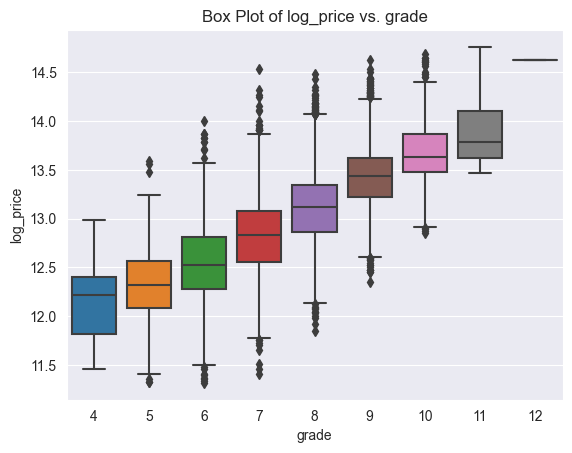

In [323]:
df_orig['log_price'] = np.log(df_orig['price'])

# box plot of log_price vs. floors
sns.boxplot(x="grade", y="log_price", data=df_orig)
plt.title("Box Plot of log_price vs. grade")
plt.xlabel("grade")
plt.ylabel("log_price")
plt.show()

This is not surprising, as the grade of a house is a good indicator of its quality, and quality is a good indicator of price. This is even more evident when we consider the descriptions of the King County grading system:
- 1-3 Falls short of minimum building standards. Normally cabin or inferior structure.
- 4 Generally older, low quality construction. Does not meet code.
- 5 Low construction costs and workmanship. Small, simple design.
- 6 Lowest grade currently meeting building code. Low quality materials and simple designs.
- 7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.
- 8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.
- 9 Better architectural design with extra interior and exterior design and quality.
- 10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.
- 11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.
- 12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
- 13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

However, the issue of relying too much on one feature is still present, especially as there is a lot of variance of prices within each grade:



Text(0.5, 1.0, 'Histogram of log_price per grade')

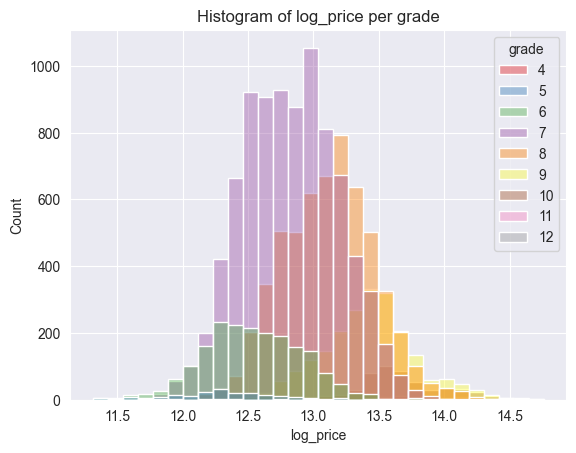

In [324]:
fig, ax = plt.subplots()
sns.histplot(data=df_orig[['log_price', 'grade']], x='log_price', hue='grade', bins=30, ax=ax, alpha=0.4, palette='Set1')
plt.title("Histogram of log_price per grade")

This may explain the low accuracy of the DT model, as while mean log prices are higher for higher grades, there is a lot of overlap between each grade. Therefore, will be a lot of inaccuracy from over-relying on this noisy signal.

Finally, let's discuss the visualization of the tree (see the visualization for dt_reg3 above). As we can see, we tuned the DT model to only go to a max depth of 7. We can also see the importance placed on features 4, 2, and 6, verified by our checking of the features importance attribute. We can also see that the relatively higher MSE at the top nodes (starting at 0.208), it can indicate that our model is overfitting the data as we have discussed before.

#### 2.3.1. Decision Tree Error Analysis

Since DT has such a low accuracy score, we will try to look at the number of error samples out of the test samples.

In [325]:
y_pred = dt_reg3.predict(X_test)

# Assume that y_test and y_pred are the ground truth and predicted values respectively
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse:.3f}\nMAE: {mae:.3f}")

# Define the threshold for the error
# Since the MSE is already high (> 0.1), we will keep MSE as the threshold without multiplying it
threshold = mse

# Find the samples with large error
large_error_samples = []
for i, error in enumerate(y_test - y_pred):
    if abs(error) > threshold:
        large_error_samples.append(i)

print("\nNumber of error samples:", len(large_error_samples), f"(out of {len(y_pred)} y_pred samples)")

MSE: 0.110
MAE: 0.264

Number of error samples: 2869 (out of 3840 y_pred samples)


This is a substantial number of error samples (2869/3840). As mentioned in the DT results interpretation, we believe that the errors come from the fact that the DT is not taking into account the non-linear relationship between the feature variables and target variable. Other methods of error analysis have yet to be taught in class.

## Part 3: Random Forest Model

### 3.1. Setting Up Random Forest Regressor

In [326]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [327]:
rf_accuracy = rf_reg.score(X_test, y_test)
f"Accuracy score for RF Regressor: {rf_accuracy:.3f}"

'Accuracy score for RF Regressor: 0.471'

We started off with the default parameters: the accuracy is much better than the baseline DT model and rivals the accuracy of the DT model after parameter tuning. We will now explore whether the RF accuracy can also be explored via parameter tuning:

### 3.2. Random Forest Error Analysis

In [328]:
from sklearn.metrics import r2_score

# Make predictions on the training set
y_test_pred = rf_reg.predict(X_test)

# Calculate mean squared error (MSE), mean absolute error (MAE), and R-squared
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"MSE: {mse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R^2: {r2:.3f}")

MSE: 0.111
MAE: 0.261
R^2: 0.471


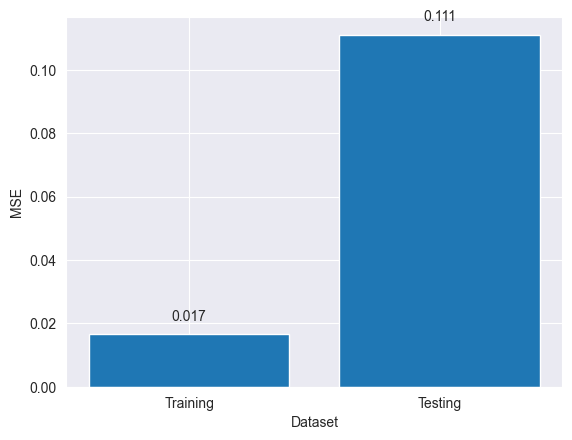

In [329]:
# MSE Comparison for Training and Testing for Default Random Forest Model
y_train_pred = rf_reg.predict(X_train)

# Calculate the mean squared error (MSE) for the training set and testing set
test_mse = mse
train_mse = mean_squared_error(y_train, y_train_pred)

# Plot the MSE for the training set and testing set
container = plt.bar(["Training", "Testing"], [train_mse, test_mse])
plt.bar_label(container, labels=[round(train_mse, 3), round(test_mse, 3)], padding=8)
plt.xlabel("Dataset")
plt.ylabel("MSE")
plt.show()

As shown in the plot above, this model is overfitting (the MSE for the testing data is higher than that for the training data). Below, we will tune the parameters to reduce overfitting the data.

### 3.3. Fine-Tuning Random Forest Parameters

First adjusting the max_depth parameter:

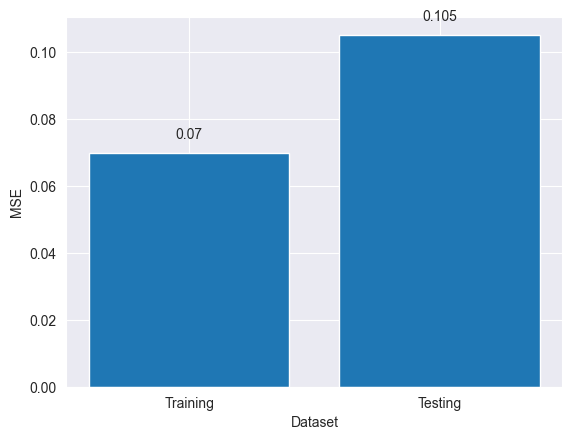

New accuracy score for RF Regressor: 0.499; max_depth = 11


In [330]:
max_depths = [11] # [(1 + 2*i) for i in range(1, 7)] <-- uncomment to simulate
rf_reg_results = pd.DataFrame()
for max_depth in max_depths:
    # Random Forest Regressor for 1000 Estimators, now adding in a max_depth
    rf_reg1 = RandomForestRegressor(n_estimators=1000, max_depth=max_depth, random_state=42)
    rf_reg1.fit(X_train, y_train)

    # Make predictions on the training set and testing set
    y_train_pred1 = rf_reg1.predict(X_train)
    y_test_pred1 = rf_reg1.predict(X_test)

    
    # Visualise results if max_depth == 11
    if max_depth == 11:
        # Calculate the mean squared error (MSE) for the training set and testing set
        train_mse1 = mean_squared_error(y_train, y_train_pred1)
        test_mse1 = mean_squared_error(y_test, y_test_pred1)

        # Plot the MSE for the training set and testing set
        container = plt.bar(["Training", "Testing"], [train_mse1, test_mse1])
        plt.bar_label(container, labels=[round(train_mse1, 3), round(test_mse1, 3)], padding=8)
        plt.xlabel("Dataset")
        plt.ylabel("MSE")
        plt.show()

    accuracy = rf_reg1.score(X_test, y_test)
    print(f"New accuracy score for RF Regressor: {accuracy:.3f}; max_depth = {max_depth}")
    rf_reg_results.loc[max_depth, "accuracy"] = accuracy

The max_depth=11 model is shown: through iterative testing, we found that this parameter setting produced the highest accuracy. The discrepancy between the training and test MSE has decreased, suggesting that there is less over-fitting, and the MSE for the testing data has also marginally decreased, signifying a slight boost in accuracy. Indeed this is the case, as the accuracy is now 0.499 compared to the base model with untuned parameters, which has an accuracy of 0.471. However, this is still far from the desired accuracy. Nonetheless, the accuracy beats the DT models. This is likely from the fact that the RF model is relatively more robust to overfitting than the DT model due to the 1000 simulations, which also allows us to have a slightly deeper tree.

Testing whether changing min_samples_leaf will help reduce overfitting:

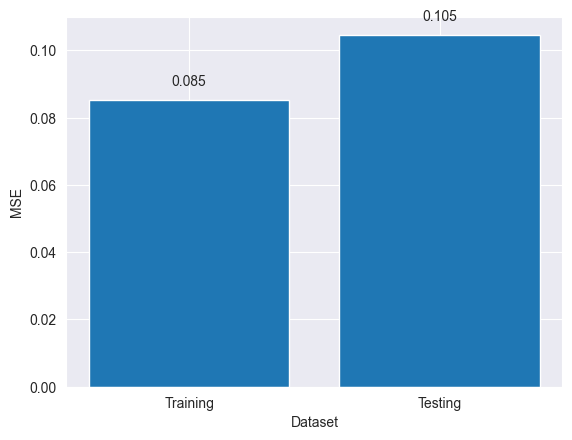

Training MSE: 0.085; Testing MSE: 0.105
Training MAE: 0.235; Testing MAE: 0.257
New accuracy score for RF Regressor: 0.501; max_depth = 11, min_samples_split = 50


In [331]:
max_depth = 11
min_samples_splits = [50] # [5*i for i in range(1, 21)] <--- uncomment to simulate
rf_reg_results = pd.DataFrame()
for min_samples_split in min_samples_splits:
    # Random Forest Regressor for 1000 Estimators, now adding in a max_depth
    rf_reg2 = RandomForestRegressor(n_estimators=1000, min_samples_split=min_samples_split, max_depth=max_depth, random_state=42)
    rf_reg2.fit(X_train, y_train)

    # Make predictions on the training set and testing set
    y_train_pred2 = rf_reg2.predict(X_train)
    y_test_pred2 = rf_reg2.predict(X_test)

    # Visualise results if min_samples_split == 50
    if min_samples_split == 50:
        # Calculate the mean squared error (MSE) for the training set and testing set
        train_mse2 = mean_squared_error(y_train, y_train_pred2)
        test_mse2 = mean_squared_error(y_test, y_test_pred2)
        test_mae2 = mean_absolute_error(y_test, y_test_pred2)
        train_mae2 = mean_absolute_error(y_train, y_train_pred2)
        # Plot the MSE for the training set and testing set
        container = plt.bar(["Training", "Testing"], [train_mse2, test_mse2])
        plt.bar_label(container, labels=[round(train_mse2, 3), round(test_mse2, 3)], padding=8)
        plt.xlabel("Dataset")
        plt.ylabel("MSE")
        plt.show()
        print(f"Training MSE: {train_mse2:.3f}; Testing MSE: {test_mse2:.3f}")
        print(f"Training MAE: {train_mae2:.3f}; Testing MAE: {test_mae2:.3f}")

    accuracy = rf_reg2.score(X_test, y_test)
    if min_samples_split == 50:
        rf_accuracy = accuracy
    print(f"New accuracy score for RF Regressor: {accuracy:.3f}; max_depth = {max_depth}, min_samples_split = {min_samples_split}")
    rf_reg_results.loc[min_samples_split, "accuracy"] = accuracy

We have an improved discrepancy between the training and test MSE; however, the accuracy score and MSE for the test dataset is approximately the same as the case where min_samples_split is unrestricted. This suggests that in combination, max_depth and min_samples_split serve similar purposes for avoiding overfitting. However, the accuracy score is still not satisfactory. This will be explored later via PCA analysis in order to improve the data inputs.

In [332]:
# More model evaluation: show top coefficient features
importances = rf_reg2.feature_importances_
results_rf = pd.DataFrame({'feature name': list(X.columns), 'importance': importances})
results_rf.index.name = "feature"
results_rf = results_rf.sort_values('importance', ascending=False)
results_rf

,feature name,importance
feature,,
4,grade,0.626256
2,sqft_living,0.101089
7,sqft_living15,0.082131
6,sqft_basement,0.065633
3,floors,0.045862
5,sqft_above,0.034993
1,bathrooms,0.026979
0,bedrooms,0.017056


### 3.4. Interpreting Random Forest Performance

We can see that further adjustments of the parameters can change the MSE valuations and improve the accuracy score. However, the improvements are not as significant as the improvements to the baseline DT. This is because RF is less prone to overfitting in the first instance, due to it being an accumulation of many simulated decision trees. We have written our analysis of the signifcance of the MSE and its implications for our model above.

In [333]:
display(pd.concat([results_dt, results_rf[["importance"]]], axis=1).set_axis(["feature name", "importance (DT)", "importance (RF)"], axis=1))
print(f"Accuracy score for DT Regressor: {dt_accuracy:.3f}")
print(f"Accuracy score for RF Regressor: {rf_accuracy:.3f}")

,feature name,importance (DT),importance (RF)
feature,,,
4,grade,0.712679,0.626256
2,sqft_living,0.079729,0.101089
6,sqft_basement,0.065215,0.065633
7,sqft_living15,0.055607,0.082131
3,floors,0.048389,0.045862
5,sqft_above,0.017099,0.034993
1,bathrooms,0.011479,0.026979
0,bedrooms,0.009802,0.017056


Accuracy score for DT Regressor: 0.475
Accuracy score for RF Regressor: 0.501


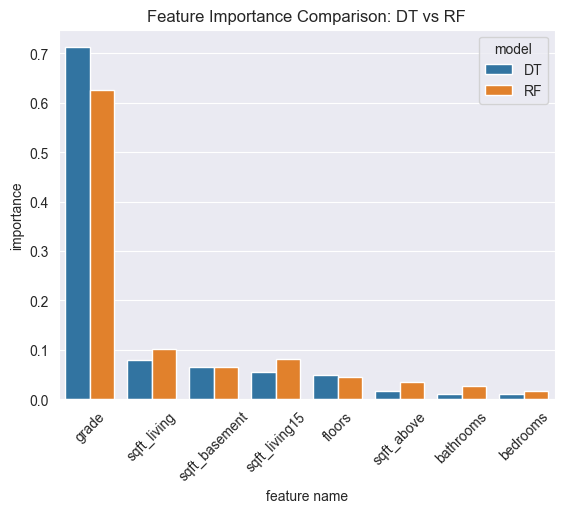

In [334]:
results_dt["model"] = "DT"
results_rf["model"] = "RF"
sns.barplot(data=pd.concat([results_dt, results_rf]), x="feature name", y="importance", hue="model")
plt.xticks(rotation=45)
plt.title("Feature Importance Comparison: DT vs RF")
plt.show()

As we can see above, the DT and RF models generally agree on the order of importance of the features (although the RF places greater importance on sqft_living15 compared to sqft_basement). The RF model is also less biased towards the grade feature, with marginally more importance placed on the other features. This is further evidence that the RF model is relatively more robust against overfitting and is less biased towards idosyncratic noise from one Decision Tree simulation, which is more prone to lean heavily towards one feature than is ideal. The RF model may also be taking into account the non-linear relationships of the feature variables with the target variable better than the DT.

Logically, do these features make sense to have importance placed on them? Looking back at our EDA, the Pearson's correlation coefficient against log_price for grade is 0.61 (grade has a feature importance of 62.6% under RF), for sqft_living it is 0.59 sqft_living15 (feature importance of 10.1% under RF), for sqft_living it is 0.52 (feature importance of 8.2% under RF), and for sqft_basement it is 0.24 (feature importance of 6.6% under RF). 3 of these variables were in the top 4 variables with the highest correlation with log_price, although it is worth noting that higher correlation does not necessarily imply a feature will be very informative. For example, sqft_above has a lower importance under the RF model compared to sqft_basement, even though sqft_above has a higher correlation with log_price (they are also closely related measures; potentially sqft_above is captured via sqft_living). Furthermore, despite bathrooms having the 5th highest correlation with log_price, it is the second-lowest important feature in the RF model. Intuitively, it makes sense that grade, along with various measures for square footage of the main part of the home are the strongest indicators of price (as suggested by RF), as these are more commonly beneficial features for a home. On the other hand, for each given pricepoint of homes, there can be more variation in the number of bathrooms, bedrooms, and floors (e.g. compare a four-storey family-home with a two-storey mansion; the latter is likely to be more expensive, and this is better reflected in grade/sqft measures rather than the number of floors).

This makes sense for our hypothesis after looking at the DT, that there are multiple features that are influential for log_price, the target variable. As we have noted, Pearson's correlation is a linear correlation measure, and clearly there are multiple features that have, on their own, a moderate linear correlation with price. The RF taking these features into account in training the model is crucial and has led to its better performance versus DT.

## Part 4. Linear Regression Model

### 4.1. Setting Up Linear Regression Model

Using statsmodels to get the summary of the standard OLS linear regression model (interested in the accuracy score: R-squared, and the coefficients on the intercept and the features). For this stage, I use statsmodels to get a nicer summary of the model, and compute the accuracy score by hand for the test dataset.

In [335]:
import statsmodels.api as sm
reg_result = sm.OLS(y_train, sm.add_constant(X_train)).fit()
reg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     1862.
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:29:34   Log-Likelihood:                -5030.1
No. Observations:               15358   AIC:                         1.008e+04
Df Residuals:                   15350   BIC:                         1.014e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.9577      0.011   1085.962      0.000      11.936      11.979
bedrooms         -0.1020      0.013     -7.706      0.000      -0.128      -0.076
bathrooms        -0.1410      0.018     -7.923      0.000      -0.176      -0.106
sqft_living       0.3040      0.014     22.363      0.000       0.277       0.331
floors            0.1988      0.017     11.512      0.000       0.165       0.233
grade             1.4680      0.035     42.515      0.000       1.400       1.536
sqft_above        0.1925      0.015     12.594      0.000       0.163       0.223
sqft_basement     0.3890      0.011     36.432      0.000       0.368       0.410
sqft_living15     0.3578      0.023     15.391      0.000       0.312       0.403
==============================================================================
Omnibus:                       19.104   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.272
Skew:                           0.063   Prob(JB):                     0.000108
Kurtosis:                       2.887   Cond. No.                     1.40e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.8e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

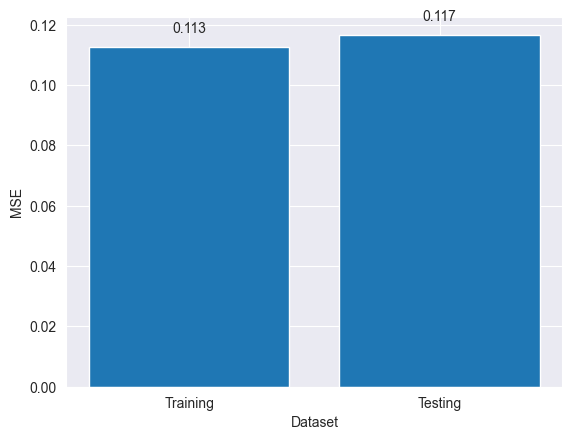

Training MSE: 0.113; Testing MSE: 0.117
Training MAE: 0.271; Testing MAE: 0.275


'Accuracy score for linear regression (OLS): 0.444'

In [336]:
# Make predictions on the training set and testing set
y_test_pred = reg_result.predict(sm.add_constant(X_test))
y_train_pred = reg_result.predict(sm.add_constant(X_train))

# Calculate the mean squared error (MSE) for the training set and testing set
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Plot the MSE for the training set and testing set
container = plt.bar(["Training", "Testing"], [train_mse, test_mse])
plt.bar_label(container, labels=[round(train_mse, 3), round(test_mse, 3)], padding=8)
plt.xlabel("Dataset")
plt.ylabel("MSE")
plt.show()

# Print the results
accuracy = r2_score(y_test, y_test_pred)
print(f"Training MSE: {train_mse:.3f}; Testing MSE: {test_mse:.3f}")
print(f"Training MAE: {train_mae:.3f}; Testing MAE: {test_mae:.3f}")
f"Accuracy score for linear regression (OLS): {accuracy:.3f}"

#### 4.1.1. Interpreting Results from OLS Linear Regression

Just running a standard linear regression model, we observe that:
- The coefficient on grade is the highest, which adds support to the RF and DT models which named it as the most important feature (as the variables were standardised, the relative size of the coefficient translates to the importance of this feature relative to the other features in the model)
- There is slight multicolinearity between the features noted, which may be explainable as some features may be closely related (e.g. sqft_living15 and sqft_living)
- However, the accuracy for the model (R-squared of 0.444 on the test data), similar to the DT and RF accuracy scores: this is still far from desired. A potential explanation could be the overweighting on grade like we saw in our DT model, as here the grade has the greatest coefficient by far. This has also potentially led to the coefficients on bedrooms and bathrooms to be negative, which is counterintuitive (generally, the more bedrooms/bathrooms a property has, the more expensive it is).

We will now try to improve the model by using a regularised linear regression models:

### 4.2. Lasso Regression: Linear Regression with L1 Regularization

In [339]:
from sklearn.linear_model import Lasso

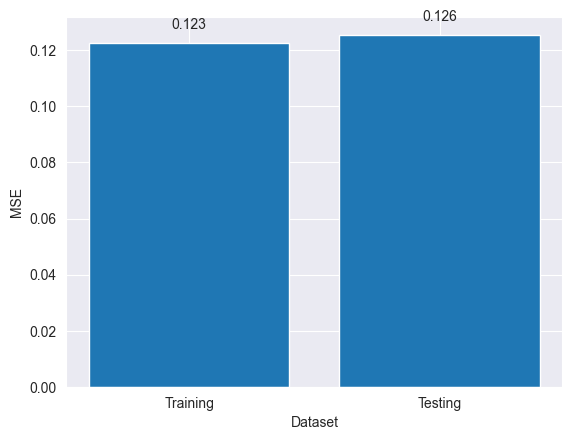

Training MSE: 0.123; Testing MSE: 0.126
Training MAE: 0.284; Testing MAE: 0.287
New accuracy score using Lasso: 0.402
Intercept: 12.259227284977456
Coefficients:  [0.         0.         0.62045601 0.         0.78750922 0.
 0.09057449 0.21223627]


In [340]:
# Lasso Regression
l1_reg_results = pd.DataFrame()
alphas = [i * 0.01 for i in range (1, 101)]
for alpha in alphas:
    reg_l1 = Lasso(alpha=alpha, random_state=42)
    reg_l1.fit(X_train, y_train)

    # Make predictions on the training set and testing set
    y_train_pred = reg_l1.predict(X_train)
    y_test_pred = reg_l1.predict(X_test)

    lasso_accuracy = r2_score(y_test, y_test_pred)

    # Print results if alpha == 0.01
    if alpha == 0.01:
        # Calculate mean squared error (MSE), mean absolute error (MAE), and R-squared
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        
        # Plot the MSE for the training set and testing set
        container = plt.bar(["Training", "Testing"], [train_mse, test_mse])
        plt.bar_label(container, labels=[round(train_mse, 3), round(test_mse, 3)], padding=8)
        plt.xlabel("Dataset")
        plt.ylabel("MSE")
        plt.show()

        # Print the results    
        print(f"Training MSE: {train_mse:.3f}; Testing MSE: {test_mse:.3f}")
        print(f"Training MAE: {train_mae:.3f}; Testing MAE: {test_mae:.3f}")
        print(f"New accuracy score using Lasso: {lasso_accuracy:.3f}")
        print(f"Intercept: {reg_l1.intercept_}")
        print("Coefficients: ", reg_l1.coef_)

    # Store results in DataFrame
    l1_reg_results.loc[alpha, "accuracy"] = lasso_accuracy


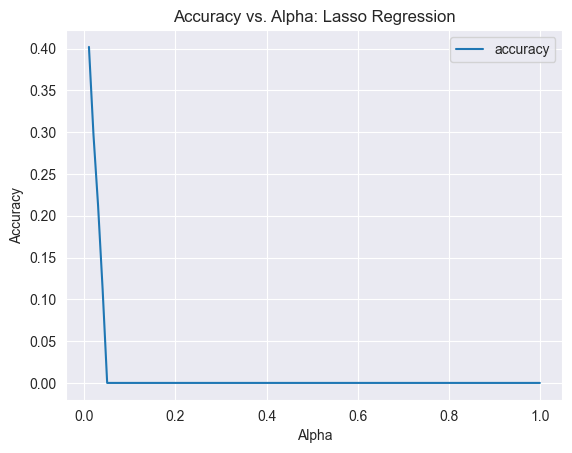

,accuracy
0.01,0.401943
0.02,0.296363
0.03,0.212514
0.04,0.112337
0.05,-0.000012


In [341]:
# Plot the accuracy for each alpha
l1_reg_results.plot()
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Alpha: Lasso Regression")
plt.show()

display(l1_reg_results.head())

#### 4.2.1. Interpretation of Lasso Results

We see that the optimal alpha is 0.01, which provides the greatest accuracy (albeit lower than the DT, RF and standard linear regression accuracy scores). Small levels of penalisation work best in this case, with the reasoning following. For any alphas greater than 0.04, the Lasso regression has converged to zero (even if we adjust further parameters such as positive=True, which forces coefficients to be positive, and tolerance). In this case, the coefficients have become zero, meaning Lasso has generated a corner solution, as shown graphically in the below Figure from Hastie et al. "The Elements of Statistical Learning" (2009):

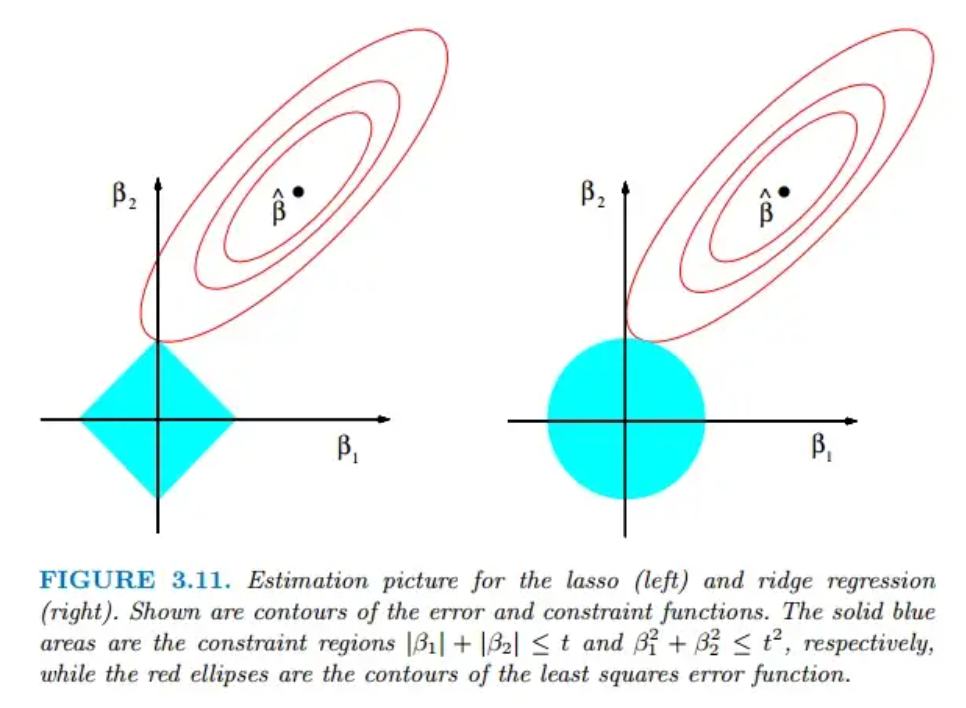

This implies that some of the features have been dropped from the model and, given the diamond-shaped constraint from having a penalty from *absolute* deviations, the model has converged to a corner solution with zero coefficients (unless we enforce close to zero penalisation). This is not useful for future predictions, but is useful in telling us that there are variables that can be dropped. This will be explored in a later section using PCA analysis to see if we can reduce the dimensionality of the data and focus on the most important variations.

### 4.3. Ridge Regression: Linear Regrssion with L2 Regularization

In [345]:
from sklearn.linear_model import Ridge

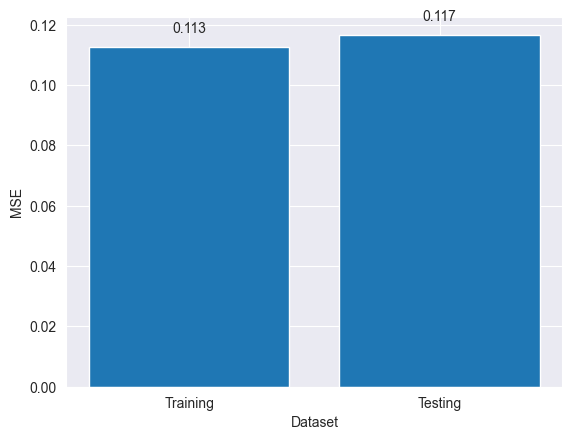

Training MSE: 0.113; Testing MSE: 0.117
Training MAE: 0.271; Testing MAE: 0.275
Accuracy score using Ridge: 0.444
Intercept: 11.957732795559341
Coefficients:  [-0.10197412 -0.14102221  0.30400216  0.19880502  1.46784323  0.1925648
  0.3890222   0.35785863]


In [346]:
# Ridge Regression

alphas = [i * 0.01 for i in range (1, 101)]
l2_reg_results = pd.DataFrame()
for alpha in alphas:
    reg_l2 = Ridge(alpha=alpha, random_state=42)
    reg_l2.fit(X_train, y_train)

    # Make predictions on the training set and testing set
    y_train_pred = reg_l2.predict(X_train)
    y_test_pred = reg_l2.predict(X_test)

    ridge_accuracy = r2_score(y_test, y_test_pred)
    
    # Print results if alpha == 0.01
    if alpha == 0.01:
        # Calculate mean squared error (MSE), mean absolute error (MAE), and R-squared
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)

        # Plot the MSE for the training set and testing set
        container = plt.bar(["Training", "Testing"], [train_mse, test_mse])
        plt.bar_label(container, labels=[round(train_mse, 3), round(test_mse, 3)], padding=8)
        plt.xlabel("Dataset")
        plt.ylabel("MSE")
        plt.show()

        # Print the results    
        print(f"Training MSE: {train_mse:.3f}; Testing MSE: {test_mse:.3f}")
        print(f"Training MAE: {train_mae:.3f}; Testing MAE: {test_mae:.3f}")
        print(f"Accuracy score using Ridge: {ridge_accuracy:.3f}")
        print(f"Intercept: {reg_l2.intercept_}")
        print("Coefficients: ", reg_l2.coef_)

    # Store results in DataFrame 
    l2_reg_results.loc[alpha, "accuracy"] = ridge_accuracy

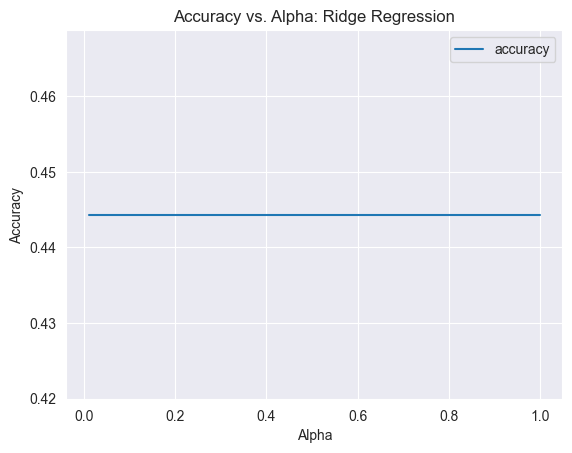

,accuracy
0.01,0.444288
0.02,0.444288
0.03,0.444288
0.04,0.444288
0.05,0.444288
...,...
0.96,0.444280
0.97,0.444279
0.98,0.444279
0.99,0.444279


In [347]:
# Plot the accuracy for each alpha
l2_reg_results.round(4).plot()
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Alpha: Ridge Regression")
plt.show()

display(l2_reg_results)

#### 4.3.1. Interpretation of Ridge Results

Unlike the Lasso regression, the Ridge regression has worked to provide non-zero coefficients across a broader spectrum of alphas. As shown in the above figure from Hastie et al. "The Elements of Statistical Learning" (2009), this is due to the constraint of having a penalty from *squared* deviations, which creates a more spherical constraint, with corner solutions (i.e. zero coefficients) being less likely.

Noteably, here there is little change in accuracy from greater penalisation. This hints that we are reaching the same optimal solution for the parameter values. However, the accuracy overall has still not made an improvement from the standard OLS linear regression model. We will now try to improve upon this by exploring the use of polynomial features to explore the non-linear relationships between the features and the target variable.

### 4.4. Polynomial Regression

In [354]:
from sklearn.preprocessing import PolynomialFeatures

Polynomial input to linear regression model:

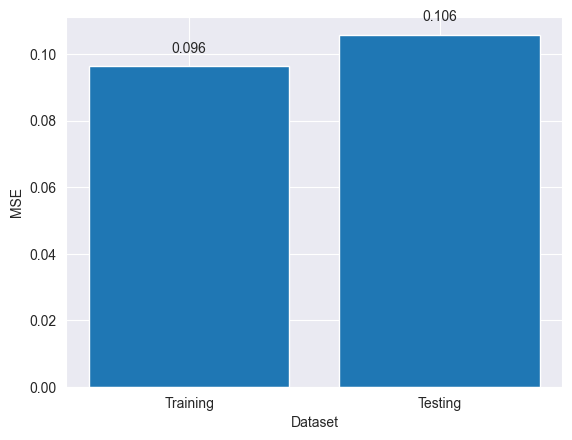

Training MSE: 0.096; Testing MSE: 0.106
Training MAE: 0.249; Testing MAE: 0.259
New accuracy score using polynomial linear regression: 0.496


In [355]:
degrees = [i for i in range(1, 6)]
poly_results_df = pd.DataFrame()
for degree in degrees:
    poly_reg = PolynomialFeatures(degree=degree)
    poly_X_train = poly_reg.fit_transform(X_train)
    poly_X_test = poly_reg.fit_transform(X_test)
    poly_reg_result = sm.OLS(y_train, sm.add_constant(poly_X_train)).fit()

    # Make predictions on the training set and testing set
    y_test_pred = poly_reg_result.predict(sm.add_constant(poly_X_test))
    y_train_pred = poly_reg_result.predict(sm.add_constant(poly_X_train))

    poly_accuracy = r2_score(y_test, y_test_pred)

    if degree == 4:
        # Calculate the mean squared error (MSE) for the training set and testing set
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        
        # Plot the MSE for the training set and testing set
        container = plt.bar(["Training", "Testing"], [train_mse, test_mse])
        plt.bar_label(container, labels=[round(train_mse, 3), round(test_mse, 3)], padding=8)
        plt.xlabel("Dataset")
        plt.ylabel("MSE")
        plt.show()

        # Print the results    
        print(f"Training MSE: {train_mse:.3f}; Testing MSE: {test_mse:.3f}")
        print(f"Training MAE: {train_mae:.3f}; Testing MAE: {test_mae:.3f}")
        print(f"New accuracy score using polynomial linear regression: {poly_accuracy:.3f}")

    # Store results in DataFrame
    poly_results_df.loc[degree, "accuracy"] = poly_accuracy


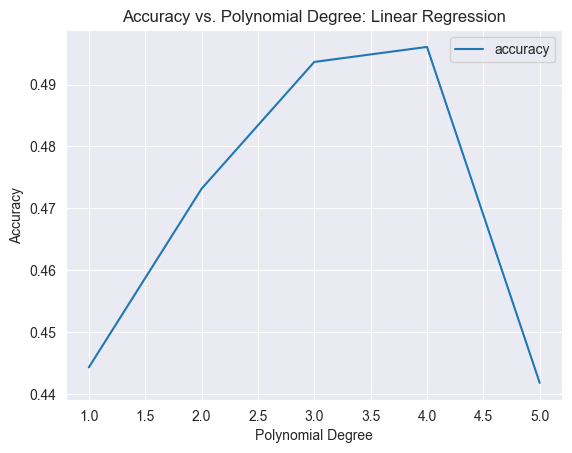

In [356]:
poly_results_df.plot()
plt.xlabel("Polynomial Degree")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Polynomial Degree: Linear Regression")
plt.show()

Using the polynomial features, we can see that the accuracy has improved to 0.496, with polynomial degree 4 providing the highest accuracy in this range; this provides a slight improvement from the standard linear regression model. This implies that the polynomial terms has provided some further explanatory power for the model. However, it is still far from a desirable accuracy score.

Exploring the polynomial input to Lasso:

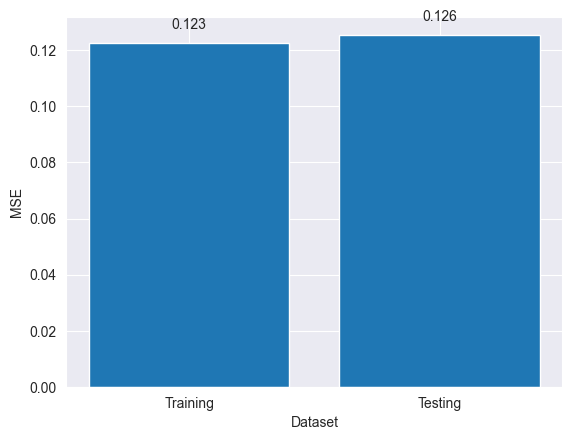

Training MSE: 0.123; Testing MSE: 0.126
Training MAE: 0.284; Testing MAE: 0.287
New accuracy score using polynomial Lasso: 0.402


In [357]:
degrees = [i for i in range(1, 6)]
poly_l1_results_df = pd.DataFrame()
for degree in degrees:
    poly_reg = PolynomialFeatures(degree=degree)
    poly_X_train = poly_reg.fit_transform(X_train)
    poly_X_test = poly_reg.fit_transform(X_test)
    poly_reg_l1 = Lasso(alpha=0.01, random_state=42)
    poly_reg_l1.fit(poly_X_train, y_train)

    # Make predictions on the training set and testing set
    y_train_pred = poly_reg_l1.predict(poly_X_train)
    y_test_pred = poly_reg_l1.predict(poly_X_test)

    poly_lasso_accuracy = r2_score(y_test, y_test_pred)

    if degree == 1:
        # Calculate the mean squared error (MSE) for the training set and testing set
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)

        # Plot the MSE for the training set and testing set
        container = plt.bar(["Training", "Testing"], [train_mse, test_mse])
        plt.bar_label(container, labels=[round(train_mse, 3), round(test_mse, 3)], padding=8)
        plt.xlabel("Dataset")
        plt.ylabel("MSE")
        plt.show()

        # Print the results    
        print(f"Training MSE: {train_mse:.3f}; Testing MSE: {test_mse:.3f}")
        print(f"Training MAE: {train_mae:.3f}; Testing MAE: {test_mae:.3f}")
        print(f"New accuracy score using polynomial Lasso: {poly_lasso_accuracy:.3f}")
        # print(f"Intercept: {poly_reg_l1.intercept_}")
        # print("Coefficients: ", poly_reg_l1.coef_)

    # Store results in DataFrame
    poly_l1_results_df.loc[degree, "accuracy"] = poly_lasso_accuracy


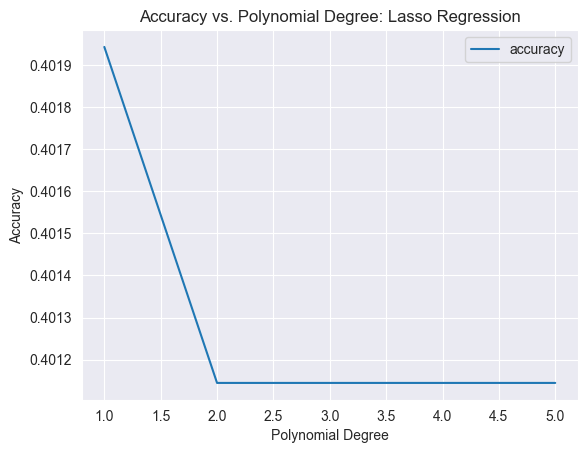

In [358]:
poly_l1_results_df.plot()
plt.xlabel("Polynomial Degree")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Polynomial Degree: Lasso Regression")
plt.show()

Here, we find little improvement in Lasso performance. This is likely due to the fact that the Lasso regression has already converged to a corner solution, and the polynomial features have not provided any further explanatory power to the model.

Exploring the polynomial input to Ridge:

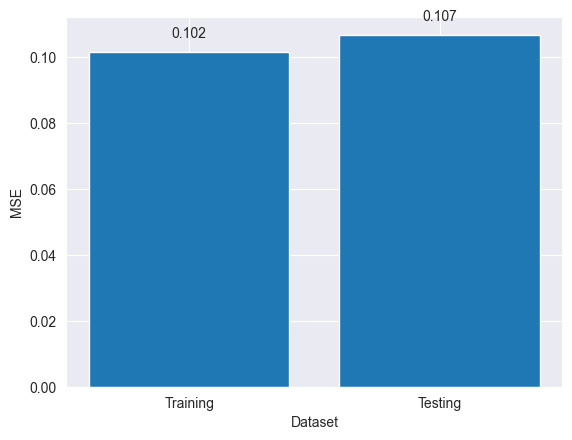

Training MSE: 0.102; Testing MSE: 0.107
Training MAE: 0.257; Testing MAE: 0.262
New accuracy score using polynomial Ridge: 0.491


In [359]:
degrees = [i for i in range(1, 11)]
poly_l2_results_df = pd.DataFrame()
for degree in degrees:
    poly_reg = PolynomialFeatures(degree=degree)
    poly_X_train = poly_reg.fit_transform(X_train)
    poly_X_test = poly_reg.fit_transform(X_test)
    poly_reg_l2 = Ridge(alpha=1, random_state=42)
    poly_reg_l2.fit(poly_X_train, y_train)

    # Make predictions on the training set and testing set
    y_train_pred = poly_reg_l2.predict(poly_X_train)
    y_test_pred = poly_reg_l2.predict(poly_X_test)

    poly_ridge_accuracy = r2_score(y_test, y_test_pred)

    if degree == 4:
        # Calculate the mean squared error (MSE) for the training set and testing set
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        
        # Plot the MSE for the training set and testing set
        container = plt.bar(["Training", "Testing"], [train_mse, test_mse])
        plt.bar_label(container, labels=[round(train_mse, 3), round(test_mse, 3)], padding=8)
        plt.xlabel("Dataset")
        plt.ylabel("MSE")
        plt.show()

        # Print the results    
        print(f"Training MSE: {train_mse:.3f}; Testing MSE: {test_mse:.3f}")
        print(f"Training MAE: {train_mae:.3f}; Testing MAE: {test_mae:.3f}")
        print(f"New accuracy score using polynomial Ridge: {poly_ridge_accuracy:.3f}")
        # print(f"Intercept: {poly_reg_l2.intercept_}")
        # print("Coefficients: ", poly_reg_l2.coef_)

    # Store results in DataFrame
    poly_l2_results_df.loc[degree, "accuracy"] = poly_ridge_accuracy


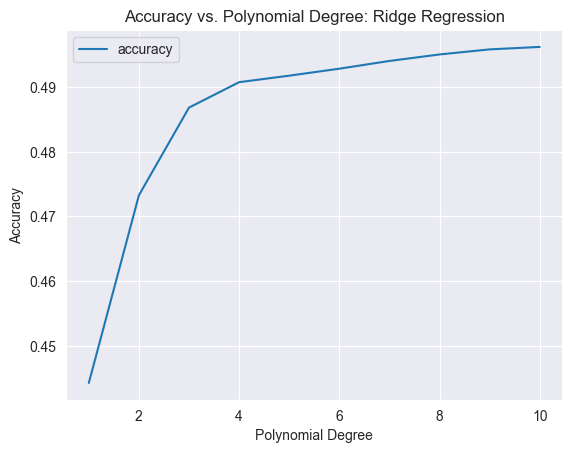

,accuracy
1,0.444279
2,0.473287
3,0.486833
4,0.490760
5,0.491765
6,0.492846
7,0.494039
8,0.495045
9,0.495828
10,0.496209


In [360]:
poly_l2_results_df.plot()
plt.xlabel("Polynomial Degree")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Polynomial Degree: Ridge Regression")
plt.show()

display(poly_l2_results_df)

Here, we find that the polynomial input to Ridge does improve the accuracy of the Ridge scores (compared to 1-degree feature inputs). Like the standard linear regressio model, this indicates that the polynomial terms are providing some explanatory power to the model. However, while the accuracy does seem to be increasing as the polynomial degrees increases, this runs the risk of fitting to spurious features which do not have much intuition in real life (e.g. the cross-term between sqft_living and sqft_living15, both raised to the 5th power, is unlikely to have any real life implications).

Since the accuracy for our models has been less than stellar, we will explore the use of PCA to improve the quality of data inputs into the model from the raw data:

## Part 5. Principal Component Analysis

In [361]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [362]:
# Change yr_renovated column to be years_since_renovation (house built date taken as renovation date if the house has never been renovated)
def calc_years_since_renovation(x):
    if x["yr_renovated"] == 0:
        return 2015 - x["yr_built"]
    return 2015 - x["yr_renovated"]

df_orig["years_since_renovation"] = df_orig.apply(calc_years_since_renovation, axis=1)

In [363]:
# Including all of the features besides id, date, and [log] price (the target variable)
df_orig["log_price"] = np.log(df_orig["price"])
X = df_orig.drop(columns=["id", "date", "price", "log_price", "yr_renovated"]).copy(deep=True)
print(len(X.columns))
# Rescaling the data to unit variance
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

pca = PCA()
pca.fit(scaled_data)
pca_var_explained = pd.DataFrame(pca.explained_variance_ratio_,columns=['Variance explained'])
display(pca_var_explained.round(3))
print(f"Total variance explained in top 3 principal components: {pca_var_explained.loc[0:3].values.sum():.2%}")
print(f"Total variance explained in top 7 principal components: {pca_var_explained.loc[0:7].values.sum():.2%}")
print(f"Total variance explained in top 10 principal components: {pca_var_explained.loc[0:10].values.sum():.2%}")

18


,Variance explained
0,0.299
1,0.122
2,0.110
3,0.079
4,0.067
5,0.057
6,0.048
7,0.041
8,0.037
9,0.030


Total variance explained in top 3 principal components: 61.01%
Total variance explained in top 7 principal components: 82.20%
Total variance explained in top 10 principal components: 91.27%


I will use the top 10 principal components as an input into the models (components that explain > 2.5% of total variance):

In [364]:
n_components = 10
pca = PCA(n_components=n_components)
pca.fit(scaled_data)
X_pca = pd.DataFrame(pca.transform(scaled_data), columns=[f"PC{i}" for i in range(1, n_components + 1)])
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.633474,-0.597244,-0.477918,0.643898,0.419057,-0.013991,0.469946,-1.059362,0.172965,0.172676
1,0.388105,0.677916,-1.266246,0.596869,1.216180,0.083643,0.072213,0.049233,0.526758,-0.000721
2,-2.915410,-0.774317,0.607334,0.132201,0.316245,-1.284617,-2.141455,-1.082103,-0.378819,0.423184
3,-1.228443,2.251314,-0.262166,-1.391836,-0.337774,1.670118,1.213960,2.055753,0.171200,-0.074767
4,0.373008,-1.155054,-0.051144,-0.063734,0.044085,-0.074123,-1.221623,-0.359268,0.019116,0.074212
...,...,...,...,...,...,...,...,...,...,...
19193,1.158152,-1.345781,-2.541699,1.435357,0.961425,0.299892,0.426982,1.404719,0.253735,-0.549604
19194,2.026101,-0.369372,-1.694362,0.721730,0.542271,0.573714,1.557587,0.015218,0.396636,0.076380
19195,-1.756462,-2.489789,-1.722318,1.649857,0.445155,0.775373,-0.030759,0.591488,-0.325066,-0.003641
19196,1.279252,-2.109547,-0.792798,0.031173,-0.475756,0.324456,-0.430474,0.610913,0.100498,-0.473940


Here, I can calculate the principal components on the entire set of X. This will not be subject to any 'lookahead' bias, as the principal components can always be recalculated once we observe the test X inputs (there is nothing based on the ground truth values in the principal components).

In [365]:
# Randomly sample 80% of the data as training data and 20% as testing data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state=42)

#### 5.1. PCA for Decision Tree Input

Rebuilding the baseline DT Regressor using the PCA inputs:

In [366]:
# Create DT Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

accuracy = dt_reg.score(X_test, y_test)
f"Accuracy score for DT Regressor (using PCA): {accuracy:.3f}"

'Accuracy score for DT Regressor (using PCA): 0.573'

Here, we have made a big improvement for the baseline DT regressor's accuracy (compared to an accuracy score of 0.073 for the initial DT regressor without PCA).

Once again, we can improve the accuracy by fine-tuning the parameters for max_depth and min_samples_split:

In [367]:
for max_depth in range(1, 15):
    dt_reg = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    dt_reg.fit(X_train, y_train)

    accuracy = dt_reg.score(X_test, y_test)
    print(f"Accuracy score for DT Regressor (using PCA): {accuracy:.3f}; max_depth = {max_depth}")

Accuracy score for DT Regressor (using PCA): 0.200; max_depth = 1
Accuracy score for DT Regressor (using PCA): 0.356; max_depth = 2
Accuracy score for DT Regressor (using PCA): 0.487; max_depth = 3
Accuracy score for DT Regressor (using PCA): 0.543; max_depth = 4
Accuracy score for DT Regressor (using PCA): 0.592; max_depth = 5
Accuracy score for DT Regressor (using PCA): 0.634; max_depth = 6
Accuracy score for DT Regressor (using PCA): 0.670; max_depth = 7
Accuracy score for DT Regressor (using PCA): 0.684; max_depth = 8
Accuracy score for DT Regressor (using PCA): 0.679; max_depth = 9
Accuracy score for DT Regressor (using PCA): 0.672; max_depth = 10
Accuracy score for DT Regressor (using PCA): 0.660; max_depth = 11
Accuracy score for DT Regressor (using PCA): 0.647; max_depth = 12
Accuracy score for DT Regressor (using PCA): 0.631; max_depth = 13
Accuracy score for DT Regressor (using PCA): 0.614; max_depth = 14


A max_depth of 9 provides a better accuracy, restricting the height of the tree and reducing the risk of overfitting.

In [368]:
for min_samples_split in [25*i for i in range(1, 11)]:
    dt_reg = DecisionTreeRegressor(max_depth=9, min_samples_split=min_samples_split, random_state=42)
    dt_reg.fit(X_train, y_train)

    accuracy = dt_reg.score(X_test, y_test)
    print(f"Accuracy score for DT Regressor (using PCA): {accuracy:.3f}; max_depth = 9, min_samples_split = {min_samples_split}")

Accuracy score for DT Regressor (using PCA): 0.687; max_depth = 9, min_samples_split = 25
Accuracy score for DT Regressor (using PCA): 0.688; max_depth = 9, min_samples_split = 50
Accuracy score for DT Regressor (using PCA): 0.688; max_depth = 9, min_samples_split = 75
Accuracy score for DT Regressor (using PCA): 0.690; max_depth = 9, min_samples_split = 100
Accuracy score for DT Regressor (using PCA): 0.687; max_depth = 9, min_samples_split = 125
Accuracy score for DT Regressor (using PCA): 0.685; max_depth = 9, min_samples_split = 150
Accuracy score for DT Regressor (using PCA): 0.684; max_depth = 9, min_samples_split = 175
Accuracy score for DT Regressor (using PCA): 0.678; max_depth = 9, min_samples_split = 200
Accuracy score for DT Regressor (using PCA): 0.667; max_depth = 9, min_samples_split = 225
Accuracy score for DT Regressor (using PCA): 0.664; max_depth = 9, min_samples_split = 250


A min_samples_split of 100 provides a better accuracy, again reducing the risk of overfitting by requiring a minimum number of samples in a node for it to be split.

In [369]:
for max_depth in range(1, 15):
    dt_reg = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=100, random_state=42)
    dt_reg.fit(X_train, y_train)

    accuracy = dt_reg.score(X_test, y_test)
    print(f"Accuracy score for DT Regressor (using PCA): {accuracy:.3f}; max_depth = {max_depth}, min_samples_split = 50")

Accuracy score for DT Regressor (using PCA): 0.200; max_depth = 1, min_samples_split = 50
Accuracy score for DT Regressor (using PCA): 0.356; max_depth = 2, min_samples_split = 50
Accuracy score for DT Regressor (using PCA): 0.487; max_depth = 3, min_samples_split = 50
Accuracy score for DT Regressor (using PCA): 0.543; max_depth = 4, min_samples_split = 50
Accuracy score for DT Regressor (using PCA): 0.592; max_depth = 5, min_samples_split = 50
Accuracy score for DT Regressor (using PCA): 0.632; max_depth = 6, min_samples_split = 50
Accuracy score for DT Regressor (using PCA): 0.668; max_depth = 7, min_samples_split = 50
Accuracy score for DT Regressor (using PCA): 0.686; max_depth = 8, min_samples_split = 50
Accuracy score for DT Regressor (using PCA): 0.690; max_depth = 9, min_samples_split = 50
Accuracy score for DT Regressor (using PCA): 0.693; max_depth = 10, min_samples_split = 50
Accuracy score for DT Regressor (using PCA): 0.694; max_depth = 11, min_samples_split = 50
Accuracy

Here, we have made a further improvement to the accuracy score, with an improved accuracy score of 0.694 for max_depth=11 and min_samples_split=50:

In [370]:
dt_reg = DecisionTreeRegressor(max_depth=11, min_samples_split=50, random_state=42)
dt_reg.fit(X_train, y_train)

# Calculating error measures
y_train_pred = dt_reg.predict(X_train)
y_test_pred = dt_reg.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print(f"Training MSE: {train_mse:.3f}; Testing MSE: {test_mse:.3f}")
print(f"Training MAE: {train_mae:.3f}; Testing MAE: {test_mae:.3f}")

accuracy = dt_reg.score(X_test, y_test)
print(f"Accuracy score for DT Regressor (using PCA): {accuracy:.3f}")

importances = dt_reg.feature_importances_
results_dt = pd.DataFrame({'feature name': list(X_train.columns), 'importance': importances})
results_dt.index.name = "feature"
results_dt = results_dt.sort_values('importance', ascending=False)
results_dt

Training MSE: 0.041; Testing MSE: 0.065
Training MAE: 0.150; Testing MAE: 0.186
Accuracy score for DT Regressor (using PCA): 0.692


,feature name,importance
feature,,
1,PC2,0.357679
0,PC1,0.261183
6,PC7,0.130583
4,PC5,0.110370
5,PC6,0.053667
2,PC3,0.044065
9,PC10,0.013926
8,PC9,0.011674
7,PC8,0.009973


This is a much bigger improvement compared to the initial DT regressor without PCA. This indicates that the PCA has provided a better data input for the DT regressor, although this does come with the tradeoff that we do not know exactly what the features are underlying which principal component and in what proportion.

#### 5.2. PCA for Random Forest

Baseline RF model with PCA inputs:

In [371]:
# Setting up RF Regressor
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_reg.fit(X_train, y_train)

# Calculating accuracy
rf_accuracy = rf_reg.score(X_test, y_test)
y_train_pred = rf_reg.predict(X_train)
y_test_pred = rf_reg.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print(f"Training MSE: {train_mse:.3f}; Testing MSE: {test_mse:.3f}")
print(f"Training MAE: {train_mae:.3f}; Testing MAE: {test_mae:.3f}")
print(f"Accuracy score for RF Regressor (using PCA): {rf_accuracy:.3f}")

# More model evaluation: show top coefficient features
importances = rf_reg.feature_importances_
results_rf = pd.DataFrame({'feature name': list(X_train.columns), 'importance': importances})
results_rf.index.name = "feature"
results_rf = results_rf.sort_values('importance', ascending=False)
results_rf

Training MSE: 0.006; Testing MSE: 0.044
Training MAE: 0.055; Testing MAE: 0.153
Accuracy score for RF Regressor (using PCA): 0.791


,feature name,importance
feature,,
1,PC2,0.304940
0,PC1,0.236555
6,PC7,0.121953
4,PC5,0.120765
5,PC6,0.062327
2,PC3,0.047593
7,PC8,0.030924
9,PC10,0.030880
8,PC9,0.024557


In [372]:
display(display(pd.concat([results_dt, results_rf[["importance"]]], axis=1).set_axis(["feature name", "importance (DT)", "importance (RF)"], axis=1)))

,feature name,importance (DT),importance (RF)
feature,,,
1,PC2,0.357679,0.304940
0,PC1,0.261183,0.236555
6,PC7,0.130583,0.121953
4,PC5,0.110370,0.120765
5,PC6,0.053667,0.062327
2,PC3,0.044065,0.047593
9,PC10,0.013926,0.030880
8,PC9,0.011674,0.024557
7,PC8,0.009973,0.030924


None

Once again, we can improve the accuracy by fine-tuning the parameters for max_depth and min_samples_split:

In [260]:
for max_depth in [1 + 2*i for i in range(5, 10)]:
    rf_reg = RandomForestRegressor(n_estimators=1000, max_depth=max_depth, random_state=42)
    rf_reg.fit(X_train, y_train)

    rf_accuracy = rf_reg.score(X_test, y_test)
    print(f"Accuracy score for RF (using PCA): {rf_accuracy:.3f}; max_depth = {max_depth}")

Accuracy score for RF (using PCA): 0.778; max_depth = 11
Accuracy score for RF (using PCA): 0.787; max_depth = 13
Accuracy score for RF (using PCA): 0.790; max_depth = 15
Accuracy score for RF (using PCA): 0.791; max_depth = 17
Accuracy score for RF (using PCA): 0.791; max_depth = 19


The accuracy score has not been improved from the baseline RF model with PCA, if we fine-tune for max_depths.

In [261]:
max_depth = 17
for min_samples_split in [25*i for i in range(1, 9)]:
    rf_reg = RandomForestRegressor(n_estimators=1000, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    rf_reg.fit(X_train, y_train)

    rf_accuracy = rf_reg.score(X_test, y_test)
    print(f"Accuracy score for RF (using PCA): {rf_accuracy:.3f}; max_depth = {max_depth}, min_samples_split = {min_samples_split}")

Accuracy score for RF (using PCA): 0.783; max_depth = 17, min_samples_split = 25
Accuracy score for RF (using PCA): 0.770; max_depth = 17, min_samples_split = 50
Accuracy score for RF (using PCA): 0.758; max_depth = 17, min_samples_split = 75
Accuracy score for RF (using PCA): 0.747; max_depth = 17, min_samples_split = 100
Accuracy score for RF (using PCA): 0.738; max_depth = 17, min_samples_split = 125
Accuracy score for RF (using PCA): 0.729; max_depth = 17, min_samples_split = 150
Accuracy score for RF (using PCA): 0.722; max_depth = 17, min_samples_split = 175
Accuracy score for RF (using PCA): 0.715; max_depth = 17, min_samples_split = 200


The accuracy score has not been improved from the baseline RF model with PCA, if we fine-tune for min_samples_splits too. This implies the baseline RF model with PCA inputs in this case is relatively resilient to overfitting concerns.

### 5.3. PCA for Linear Regression

Linear Regression using Principal Components:

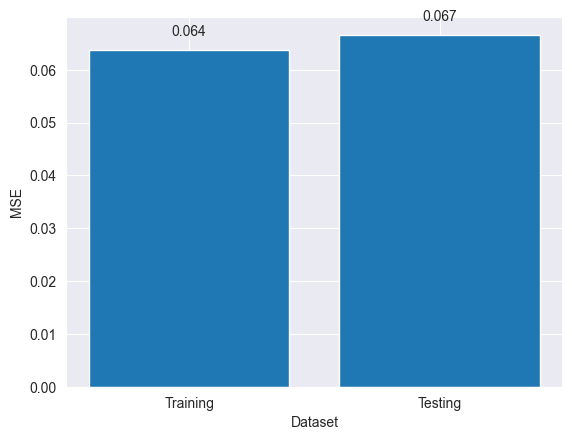

Training MSE: 0.064; Testing MSE: 0.067
Training MAE: 0.196; Testing MAE: 0.201


'New accuracy score for linear regression (using PCA): 0.683'

In [379]:
# Setting up linear regression
reg_result = sm.OLS(y_train.values, sm.add_constant(X_train)).fit()
reg_result.summary()

# Make predictions on the training set and testing set
y_test_pred = reg_result.predict(sm.add_constant(X_test))
y_train_pred = reg_result.predict(sm.add_constant(X_train))

# Calculate the mean squared error (MSE) for the training set and testing set
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)


# Plot the MSE for the training set and testing set
container = plt.bar(["Training", "Testing"], [train_mse, test_mse])
plt.bar_label(container, labels=[round(train_mse, 3), round(test_mse, 3)], padding=8)
plt.xlabel("Dataset")
plt.ylabel("MSE")
plt.show()

# Calculating accuracy
accuracy = r2_score(y_test, y_test_pred)
print(f"Training MSE: {train_mse:.3f}; Testing MSE: {test_mse:.3f}")
print(f"Training MAE: {train_mae:.3f}; Testing MAE: {test_mae:.3f}")
f"New accuracy score for linear regression (using PCA): {accuracy:.3f}"

The accuracy score has not been improved from the baseline linear regression model with PCA (accuracy score of 0.683 compared to 0.444).

Lasso Regression (L1 Regularization) using Principal Components:

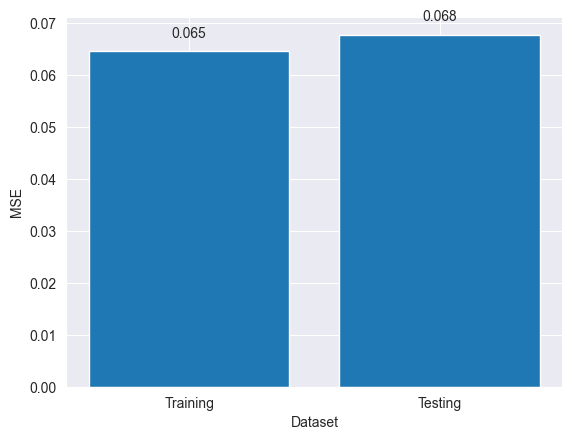

Training MSE: 0.065; Testing MSE: 0.068
Training MAE: 0.197; Testing MAE: 0.202
New accuracy score using Lasso with PCA: 0.677


In [380]:
# Lasso Regression
l1_reg_results = pd.DataFrame()
alphas = [i * 0.01 for i in range (1, 101)]
for alpha in alphas:
    reg_l1 = Lasso(alpha=alpha, random_state=42)
    reg_l1.fit(X_train, y_train)

    # Make predictions on the training set and testing set
    y_train_pred = reg_l1.predict(X_train)
    y_test_pred = reg_l1.predict(X_test)

    lasso_accuracy = r2_score(y_test, y_test_pred)

    # Print results if alpha == 0.01
    if alpha == 0.01:
        # Calculate mean squared error (MSE), mean absolute error (MAE), and R-squared
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)

        # Plot the MSE for the training set and testing set
        container = plt.bar(["Training", "Testing"], [train_mse, test_mse])
        plt.bar_label(container, labels=[round(train_mse, 3), round(test_mse, 3)], padding=8)
        plt.xlabel("Dataset")
        plt.ylabel("MSE")
        plt.show()

        # Print the results    
        print(f"Training MSE: {train_mse:.3f}; Testing MSE: {test_mse:.3f}")
        print(f"Training MAE: {train_mae:.3f}; Testing MAE: {test_mae:.3f}")
        print(f"New accuracy score using Lasso with PCA: {lasso_accuracy:.3f}")
        # print(f"Intercept: {reg_l1.intercept_}")
        # print("Coefficients: ", reg_l1.coef_)

    # Store results in DataFrame
    l1_reg_results.loc[alpha, "accuracy"] = lasso_accuracy

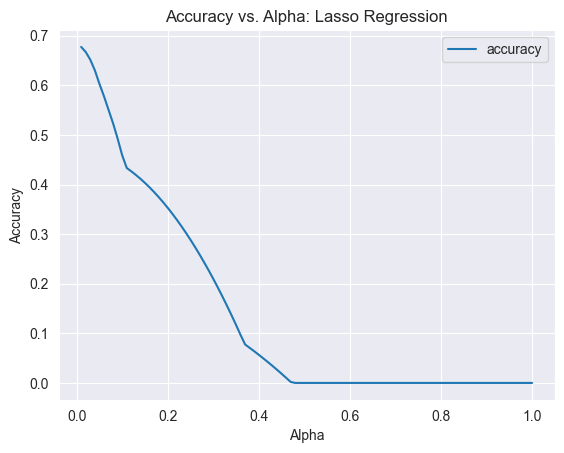

,accuracy
0.01,0.677385
0.02,0.667091
0.03,0.651541
0.04,0.630164
0.05,0.602962


In [381]:
l1_reg_results.plot()
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Alpha: Lasso Regression")
plt.show()

display(l1_reg_results.head())

Here we can notice two things:
- The accuracy for the Lasso regression has improved from the baseline Lasso regression model when we introduce PCA (accuracy score of 0.677 compared to 0.401).
- There is a wider range of alphas where coefficients are non-zero, compared to the baseline Lasso regression model without PCA. This indicates that the PCA has provided a better data input for the Lasso regression (a larger penalisation was needed in order to force coefficients to zero), although this does come with the tradeoff that we do not know exactly what the features are underlying which principal component and in what proportion.

Ridge Regression (L2 Regularization) using Principal Components:

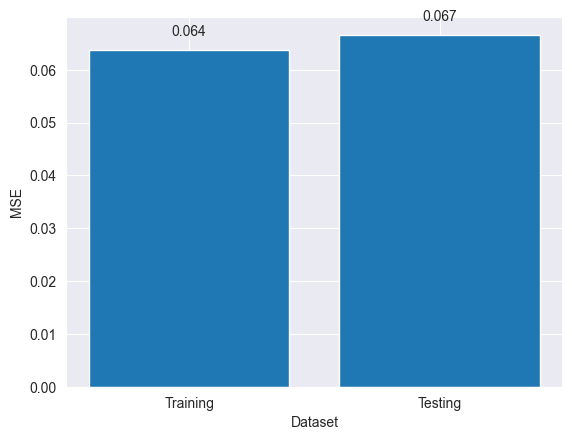

Training MSE: 0.064; Testing MSE: 0.067
Training MAE: 0.196; Testing MAE: 0.201
New accuracy score using Ridge with PCA: 0.683


In [385]:
# Ridge Regression
alphas = [i * 0.01 for i in range (1, 101)]
l2_reg_results = pd.DataFrame()
for alpha in alphas:
    reg_l2 = Ridge(alpha=alpha, random_state=42)
    reg_l2.fit(X_train, y_train)

    # Make predictions on the training set and testing set
    y_train_pred = reg_l2.predict(X_train)
    y_test_pred = reg_l2.predict(X_test)

    ridge_accuracy = r2_score(y_test, y_test_pred)
    
    # Print results if alpha == 0.01
    if alpha == 0.01:
        # Calculate mean squared error (MSE), mean absolute error (MAE), and R-squared
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)

        # Plot the MSE for the training set and testing set
        container = plt.bar(["Training", "Testing"], [train_mse, test_mse])
        plt.bar_label(container, labels=[round(train_mse, 3), round(test_mse, 3)], padding=8)
        plt.xlabel("Dataset")
        plt.ylabel("MSE")
        plt.show()

        # Print the results    
        print(f"Training MSE: {train_mse:.3f}; Testing MSE: {test_mse:.3f}")
        print(f"Training MAE: {train_mae:.3f}; Testing MAE: {test_mae:.3f}")
        print(f"New accuracy score using Ridge with PCA: {ridge_accuracy:.3f}")
        # print(f"Intercept: {reg_l2.intercept_}")
        # print("Coefficients: ", reg_l2.coef_)

    # Store results in DataFrame 
    l2_reg_results.loc[alpha, "accuracy"] = ridge_accuracy

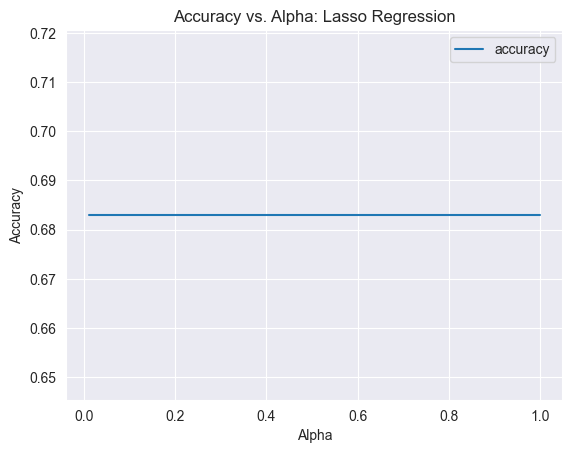

,accuracy
0.01,0.682631
0.02,0.682631
0.03,0.682631
0.04,0.682630
0.05,0.682630
...,...
0.96,0.682630
0.97,0.682630
0.98,0.682630
0.99,0.682630


In [387]:
l2_reg_results.round(3).plot()
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Alpha: Lasso Regression")
plt.show()

display(l2_reg_results)

Again, the Lasso regression performance is improved from the baseline Lasso regression model when we introduce PCA (accuracy score of 0.683 compared to 0.444). The accuracy score also seems to be more resilient to penalisation, hinting that we are reaching the same optimal solution for the parameter values.

## Part 6. Further Analysis & Conclusion

### 6.1. Further Error Analysis

I will have a look at the residuals of the models to see if there are any patterns that can be identified. Namely, I will look at the correlation between the feature values and the mean squared error. Since looking at the PCA components does not provide any intuition on the underlying features, I will look at non-PCA models instead to draw some insights.

In [428]:
# Reinitialising non-PCA data
X = model_df.drop(columns='log_price')
y = model_df.log_price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Analysing the best-performing DT Regressor (non-PCA):

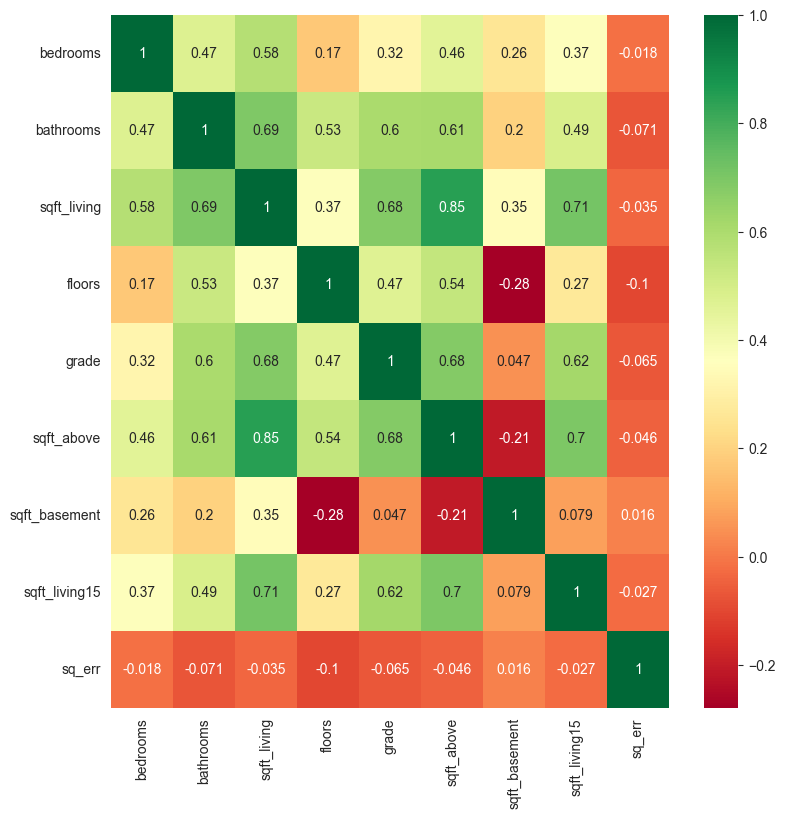

In [445]:
dt_reg = DecisionTreeRegressor(max_depth= 9, min_samples_split=200, random_state=42)
y_test_pred = dt_reg.fit(X_train, y_train).predict(X_test)
dt_reg_X = X_test.copy(deep=True)
dt_reg_X["sq_err"] = (y_test - y_test_pred) ** 2
_, ax = plt.subplots(figsize=(9,9))
sns.heatmap(dt_reg_X.corr(),annot=True,cmap='RdYlGn', ax=ax,);

Analysing the best-performing RF Regressor (non-PCA):

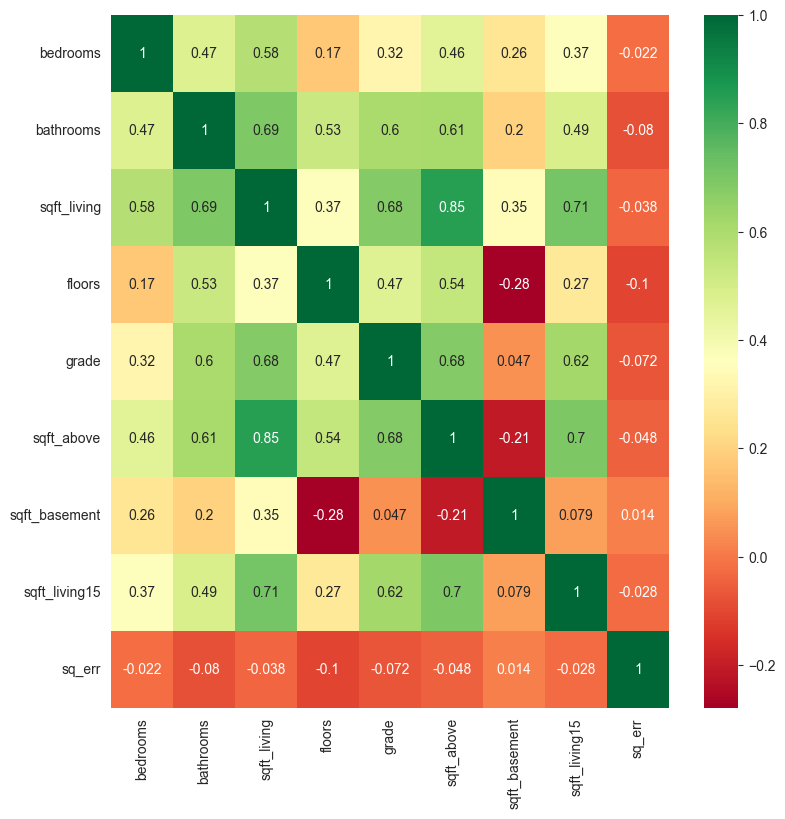

In [446]:
rf_reg = RandomForestRegressor(n_estimators=1000, min_samples_split=50, max_depth=11, random_state=42)
y_test_pred = rf_reg.fit(X_train, y_train).predict(X_test)
rf_reg_X = X_test.copy(deep=True)
rf_reg_X["sq_err"] = (y_test - y_test_pred) ** 2
_, ax = plt.subplots(figsize=(9,9))
sns.heatmap(rf_reg_X.corr(),annot=True,cmap='RdYlGn', ax=ax,);

Analysing the best-performing Linear Regression (non-PCA):

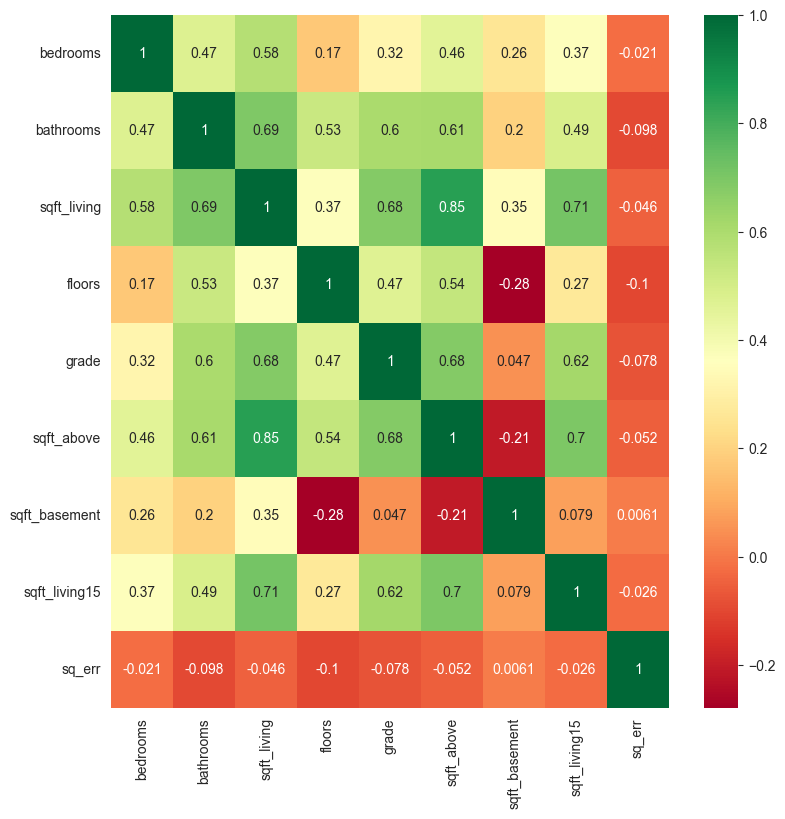

In [447]:
reg_result = sm.OLS(y_train, sm.add_constant(X_train)).fit()
y_test_pred = reg_result.predict(sm.add_constant(X_test))
lin_reg_X = X_test.copy(deep=True)
lin_reg_X["sq_err"] = (y_test - y_test_pred) ** 2
_, ax = plt.subplots(figsize=(9,9))
sns.heatmap(lin_reg_X.corr(),annot=True,cmap='RdYlGn', ax=ax,);

Looking specifically at the correlation with the sq_err rows:

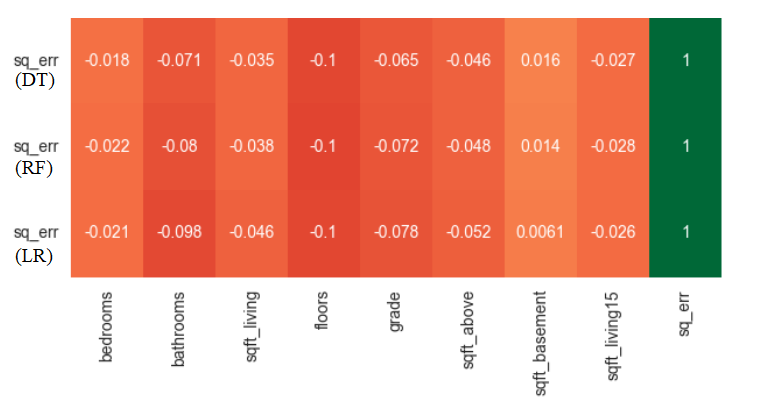

- grade, followed by sqft_above, has the highest average correlation (in absolute terms) with the squared error
- This means that, while these two features do have a high correlation with the target variable, they also have a high correlation with the squared error: they are very noisy predictors; whereas sqft_basement is a much more stable predictor, with a lower correlation with the squared error
- With access to more data (e.g. crime rates, distance to nearest school, how impatient the home-owner is to sell their house, etc.), we could try to reduce the noise in these features by using more data to train the model

### 6.2. Model Performance Comparison

Creating a summary table of all the model performances (the below table values are taken from all the best-performing analyses above; suboptimal model-parameter combinations have been excluded):

In [459]:
model_results = pd.DataFrame(columns=["Model", "Model Parameters", "Accuracy/R^2", "Test MSE", "Train MSE", "Test MAE", "Train MAE"])
model_results.loc[0] = ["Decision Tree", "max_depth=9, min_samples_split=200", 0.475, 0.110, 0.099, 0.264, 0.253]
model_results.loc[1] = ["Random Forest", "max_depth=11, min_samples_split=50", 0.501, 0.105, 0.085, 0.257, 0.235]
model_results.loc[2] = ["Linear Regression: OLS", "", 0.444, 0.117, 0.113, 0.275, 0.271]
model_results.loc[3] = ["Linear Regression: Lasso", "alpha=0.01", 0.402, 0.126, 0.123, 0.287, 0.284]
model_results.loc[4] = ["Linear Regression: Ridge", "alpha=1.0", 0.444, 0.117, 0.113, 0.275, 0.271]
model_results.loc[5] = ["Linear Regression: OLS", "Polynomial Degree 4", 0.496, 0.106, 0.096, 0.259, 0.249]
model_results.loc[6] = ["Linear Regression: Lasso", "Polynomial Degree 4, alpha=0.01", 0.402, 0.126, 0.123, 0.287, 0.284]
model_results.loc[7] = ["Linear Regression: Ridge", "Polynomial Degree 4, alpha=1.0", 0.491, 0.107, 0.102, 0.262, 0.257]
model_results.loc[8] = ["Decision Tree", "PCA", 0.692, 0.065, 0.041, 0.186, 0.150]
model_results.loc[9] = ["Random Forest", "PCA", 0.791, 0.044, 0.006, 0.153, 0.055]
model_results.loc[10] = ["Linear Regression: OLS", "PCA", 0.683, 0.067, 0.064, 0.201, 0.196]
model_results.loc[11] = ["Linear Regression: Lasso", "PCA, alpha=0.01", 0.677, 0.068, 0.065, 0.202, 0.197]
model_results.loc[12] = ["Linear Regression: Ridge", "PCA, alpha=1.0", 0.683, 0.067, 0.064, 0.201, 0.196]

model_results.sort_values(by="Accuracy/R^2", ascending=False, inplace=True)
model_results

,Model,Model Parameters,Accuracy/R^2,Test MSE,Train MSE,Test MAE,Train MAE
9,Random Forest,PCA,0.791,0.044,0.006,0.153,0.055
8,Decision Tree,PCA,0.692,0.065,0.041,0.186,0.150
10,Linear Regression: OLS,PCA,0.683,0.067,0.064,0.201,0.196
12,Linear Regression: Ridge,"PCA, alpha=1.0",0.683,0.067,0.064,0.201,0.196
11,Linear Regression: Lasso,"PCA, alpha=0.01",0.677,0.068,0.065,0.202,0.197
1,Random Forest,"max_depth=11, min_samples_split=50",0.501,0.105,0.085,0.257,0.235
5,Linear Regression: OLS,Polynomial Degree 4,0.496,0.106,0.096,0.259,0.249
7,Linear Regression: Ridge,"Polynomial Degree 4, alpha=1.0",0.491,0.107,0.102,0.262,0.257
0,Decision Tree,"max_depth=9, min_samples_split=200",0.475,0.110,0.099,0.264,0.253
2,Linear Regression: OLS,,0.444,0.117,0.113,0.275,0.271


- Of all the models, the best-performing model is the baseline Random Forest Regressor with PCA inputs, with an accuracy score of 0.791 and a MSE on test data of 0.044. While there does appear to be some overfitting bias here, as the MSE and MAE on the training data is much lower than the test data, this is much better than the worst-performing model: a linear Lasso regression without PCA inputs: here, even though there does not seem to be an overfitting bias (the MSE and MAE on the training data is approximately equal to those for the test data), the accuracy score is still very low at 0.401, showing that the model has little predictive power. Therefore, it is better to accept some overfitting tendencies to trade for better predictive power.
- All of the top models included PCA inputs, indicating that the PCA has provided a better data input for the models, although this does come with the tradeoff that we do not know exactly what the features are underlying which principal component and in what proportion.

In [461]:
display(model_results[model_results["Model"].isin(["Decision Tree"])])
display(model_results[model_results["Model"].isin(["Random Forest"])])
display(model_results[~model_results["Model"].isin(["Decision Tree", "Random Forest"])])

,Model,Model Parameters,Accuracy/R^2,Test MSE,Train MSE,Test MAE,Train MAE
8,Decision Tree,PCA,0.692,0.065,0.041,0.186,0.150
0,Decision Tree,"max_depth=9, min_samples_split=200",0.475,0.110,0.099,0.264,0.253


,Model,Model Parameters,Accuracy/R^2,Test MSE,Train MSE,Test MAE,Train MAE
9,Random Forest,PCA,0.791,0.044,0.006,0.153,0.055
1,Random Forest,"max_depth=11, min_samples_split=50",0.501,0.105,0.085,0.257,0.235


,Model,Model Parameters,Accuracy/R^2,Test MSE,Train MSE,Test MAE,Train MAE
10,Linear Regression: OLS,PCA,0.683,0.067,0.064,0.201,0.196
12,Linear Regression: Ridge,"PCA, alpha=1.0",0.683,0.067,0.064,0.201,0.196
11,Linear Regression: Lasso,"PCA, alpha=0.01",0.677,0.068,0.065,0.202,0.197
5,Linear Regression: OLS,Polynomial Degree 4,0.496,0.106,0.096,0.259,0.249
7,Linear Regression: Ridge,"Polynomial Degree 4, alpha=1.0",0.491,0.107,0.102,0.262,0.257
2,Linear Regression: OLS,,0.444,0.117,0.113,0.275,0.271
4,Linear Regression: Ridge,alpha=1.0,0.444,0.117,0.113,0.275,0.271
3,Linear Regression: Lasso,alpha=0.01,0.402,0.126,0.123,0.287,0.284
6,Linear Regression: Lasso,"Polynomial Degree 4, alpha=0.01",0.402,0.126,0.123,0.287,0.284


For linear regression, Ride and OLS seem to be on par, with poorer performance from Lasso. This is likely due to the fact that the data often forces zero coefficients with Lasso, so it is not able to perform as well as the other two models.

Overall, to improve the machine learning model for future analysis, we could:
- Use more and richer data (e.g. crime rates, distance to nearest school, how impatient the home-owner is to sell their house, etc.)
- Use more advanced models (e.g. XGBoost, Neural Networks, etc.)
- Optimise parameters using Grid Search